# Import Required Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator
import requests
from bs4 import BeautifulSoup
import datetime
from datetime import datetime
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import scipy.stats as st
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score 
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score
from sklearn import metrics


In [2]:
task_1 = pd.read_excel("file.xlsx", sheet_name = "Task 1", index_col = None)

# Calculate RSI default to 14 days window


RSI = 100 - (100 / (1 + RS))

Where: RS = ratio of smoothed average of n-period gains divided by the absolute value of the smoothed average of n-period losses.

In [3]:
def RSI(close, window=14):
    #get the difference in price from previous step
    delta = close.diff()
    #get the positive and negative gains Series and separate the positive and negative price differences into different series
    up = delta.where(delta > 0, 0)
    down = -delta.where(delta < 0, 0)

    rs = up.rolling(window).mean() / down.rolling(window).mean()
    rsi = 100 - (100 / (1 + rs))

    return rsi


# Calculate CCI default to 20 days window

CCI = ( M - A ) / ( 0.015 * D )

Where:

M = ( H + L + C ) / 3
H = Highest price for the period
L = Lowest price for the period
C = Closing price for the period
A = n period moving average of M
D = mean deviation of the absolute value of the difference between the mean price and the moving average of mean prices, M - A

In [4]:
#Price is a pd.Series
def CCI(price, window=20):
    typical_price = (price + price.shift(1) + price.shift(2)) / 3  #This is to replace High + Low + Close / 3
    mean_deviation = typical_price.rolling(window=window).apply(lambda x: np.fabs(x - x.mean()).mean())
    cci = (typical_price - typical_price.rolling(window=window).mean()) / (0.015 * mean_deviation)
    return cci

# Composite Indicator

In [5]:
def composite_indicator(rsi, cci):
    if rsi > 70 and cci > 100:
        return 2
    elif rsi > 60 and cci > 50:
        return 1
    elif rsi < 30 and cci < -100:
        return -2
    elif rsi < 40 and cci < -50:
        return -1
    else:
        return 0


# Rolling n-days z-score Of a Series

Z = observed value - mean of the sample / standard deviation of the sample

In [6]:
def rolling_zscore(series, window):

    rolling_mean = series.rolling(window=window).mean().shift(1)
    rolling_std = series.rolling(window=window).std(ddof=0).shift(1) #ddof = 0 sets the degrees of freedom to 0, meaning we are calculating the entire population

    #the shift(1) ensures that we calculate the z-score for each value using the previous n values, rather than the current value

    zscore = (series - rolling_mean) / rolling_std
    return zscore

# Rolling n-days Percentile Rank of a Series

In [7]:
def rolling_percentile_rank(series, window):
    # Compute the rolling window
    rolling_window = series.rolling(window=window)
    
    # Compute the percentile rank of each value in the window
    percentile_rank = rolling_window.apply(lambda x: pd.Series(x).rank(pct=True).iloc[-1])
    
    return percentile_rank

# Calculate the above written studies for USDCHF

# Composite indicator

In [8]:
def calculate_returns(series, n):
    
    #Calculates the forward n-day returns for a given series.
    
    returns = (series.shift(-n) - series) / series
    return returns.dropna()

In [9]:
date = task_1["date"] 
USD_CHF = task_1["USDCHF Curncy"]

In [10]:
rsi_values = RSI(USD_CHF, window=14)
print(rsi_values)
cci_values = CCI(USD_CHF, window=20)
print(cci_values)

composite = pd.Series(index=rsi_values.index)

for i in range(len(composite)):
    composite[i] = composite_indicator(rsi_values[i], cci_values[i])
print(composite)


0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
3967    62.359551
3968    57.253385
3969    60.746004
3970    61.764706
3971    56.756757
Name: USDCHF Curncy, Length: 3972, dtype: float64
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
3967   NaN
3968   NaN
3969   NaN
3970   NaN
3971   NaN
Name: USDCHF Curncy, Length: 3972, dtype: float64
0       0.0
1       0.0
2       0.0
3       0.0
4       0.0
       ... 
3967    0.0
3968    0.0
3969    0.0
3970    0.0
3971    0.0
Length: 3972, dtype: float64


C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\1839972599.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  composite = pd.Series(index=rsi_values.index)


In [11]:
df = pd.concat([date, USD_CHF, rsi_values, cci_values, composite], axis=1)
print(df.head())
df.columns = ['Date','USD_CHF', 'RSI', 'CCI', 'Composite']
df['Date'] = pd.to_datetime(df['Date'], format='%Y%m%d')
df.to_excel("3a.xlsx", index=None)
#For me to manually inspect the composite figures

        date  USDCHF Curncy  USDCHF Curncy  USDCHF Curncy    0
0 2006-01-02         1.3146            NaN            NaN  0.0
1 2006-01-03         1.2904            NaN            NaN  0.0
2 2006-01-04         1.2768            NaN            NaN  0.0
3 2006-01-05         1.2758            NaN            NaN  0.0
4 2006-01-06         1.2702            NaN            NaN  0.0


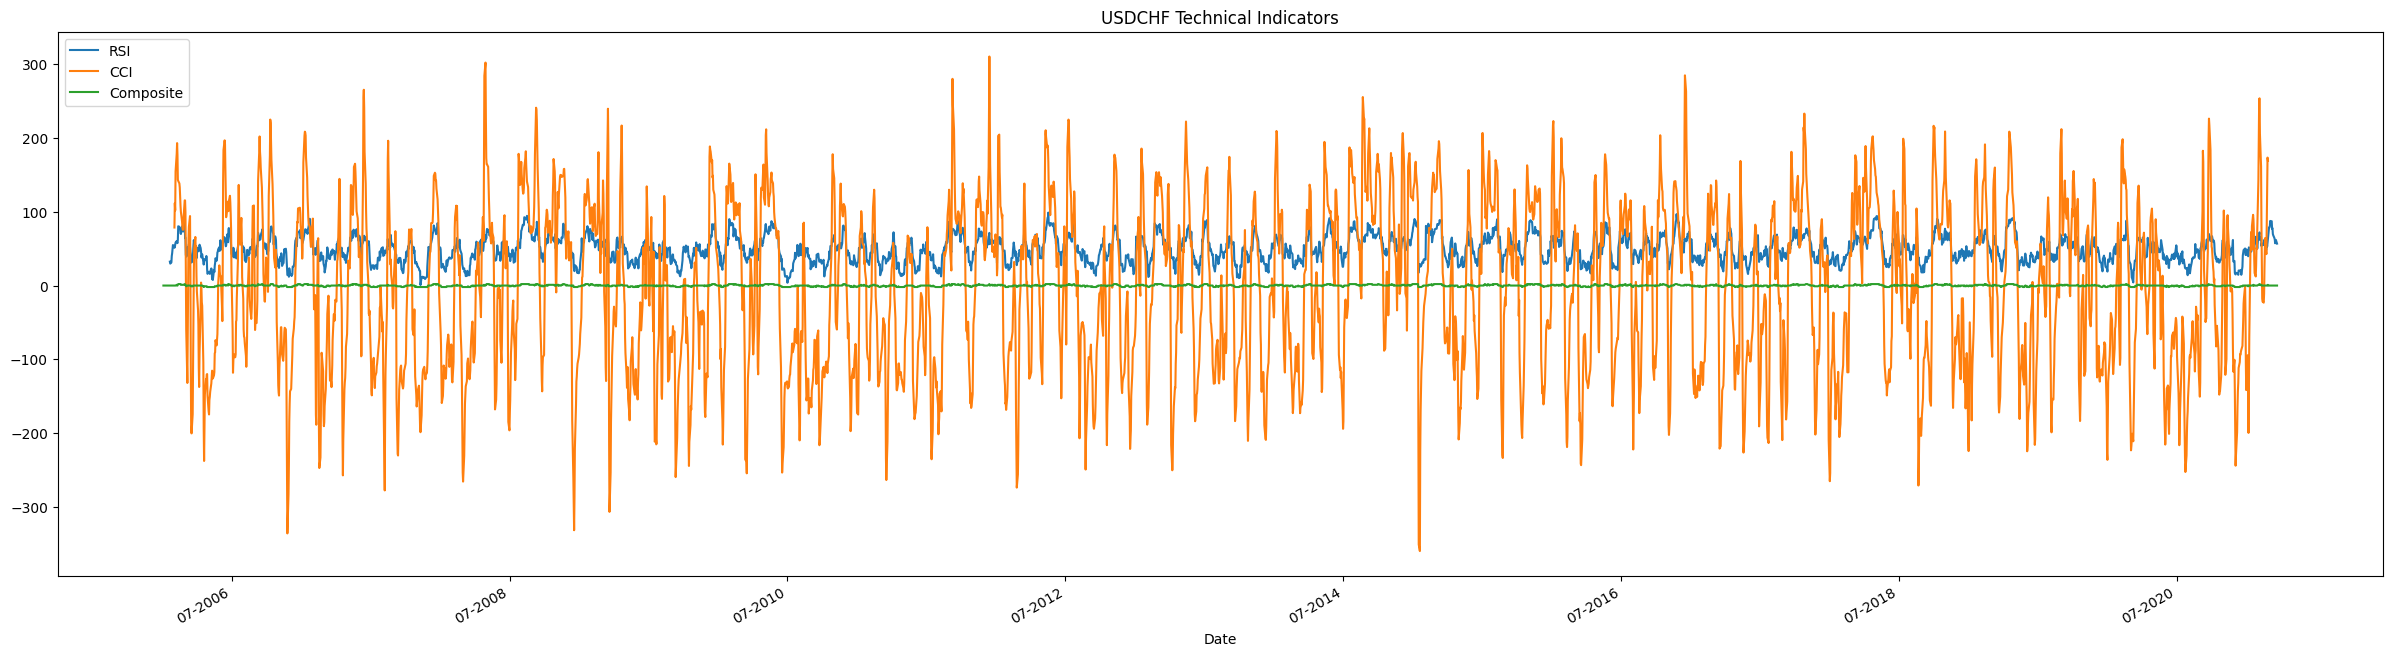

In [12]:
ax = df.plot(x = 'Date', y = ['RSI', 'CCI', 'Composite'], label = ['RSI', 'CCI', 'Composite'], figsize = (30,8), title = 'USDCHF Technical Indicators')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed
plt.legend()

Plotting the graph of the indicators would not provide us with much info since the calculation of Composite depends on RSI and CCI

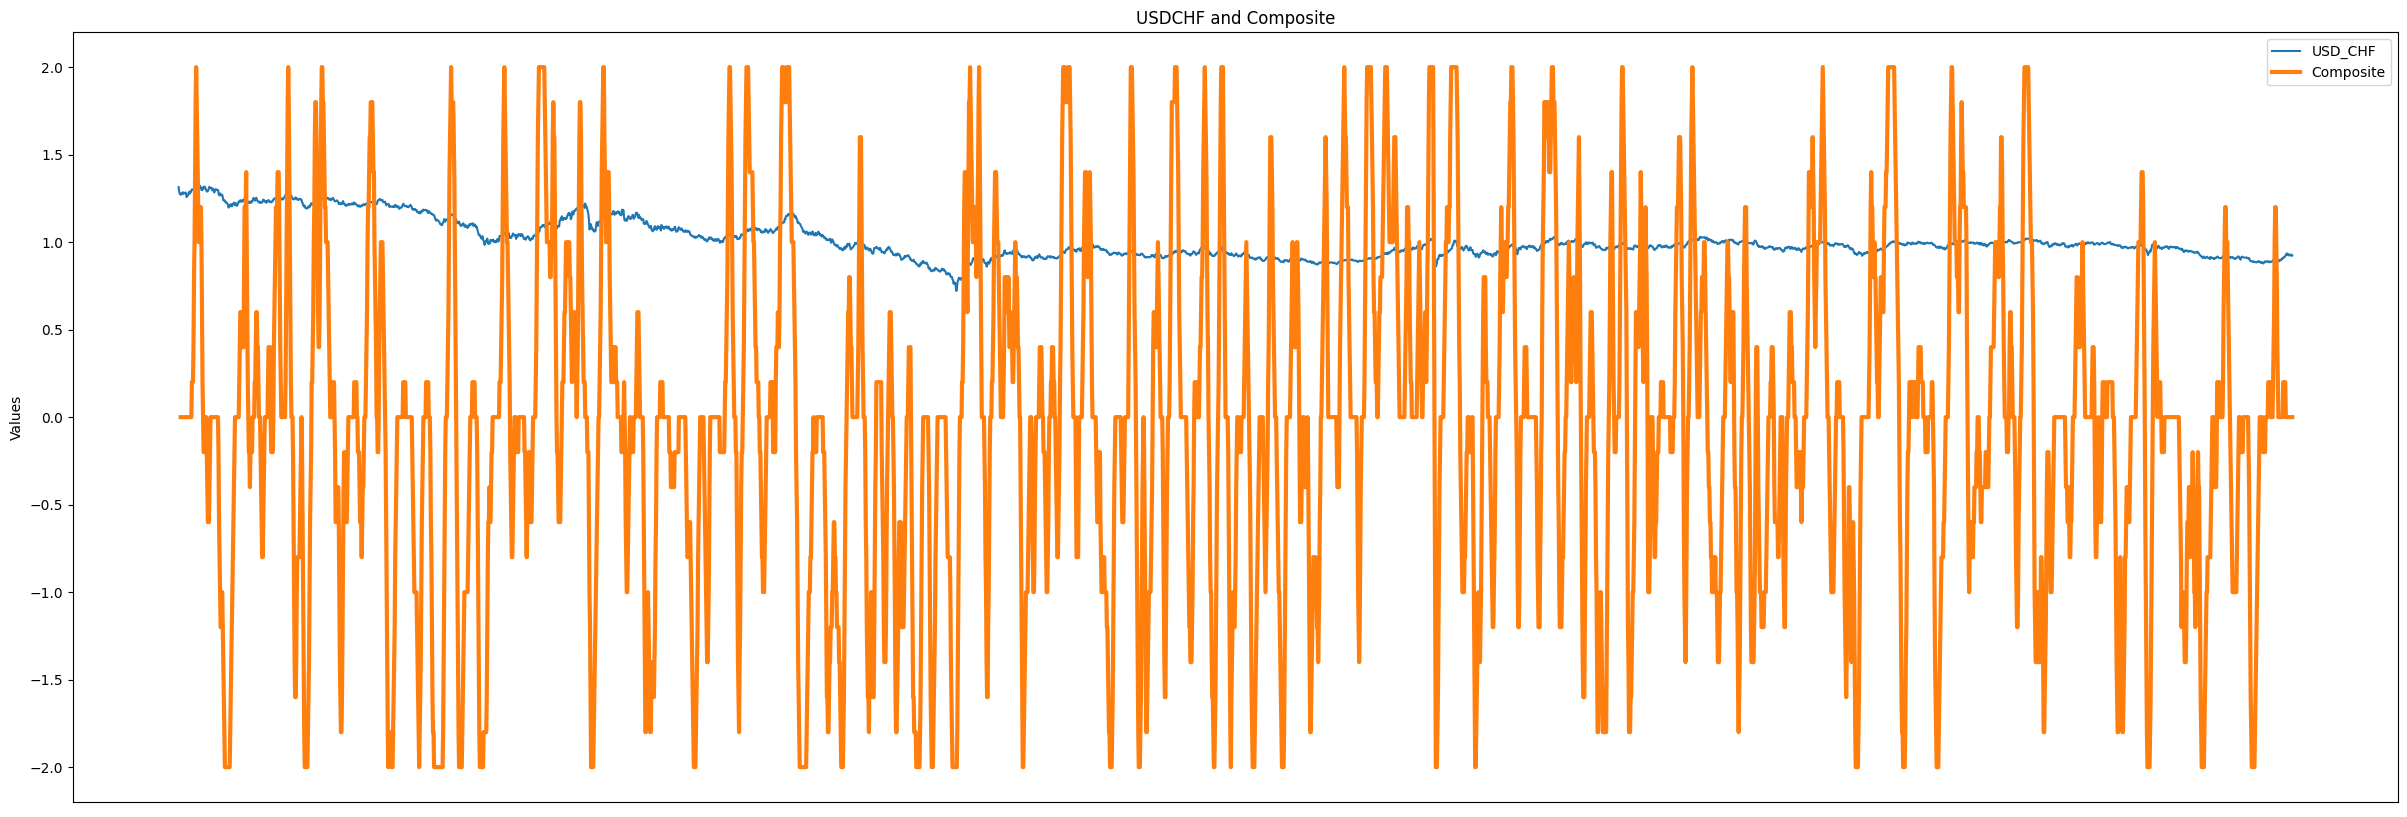

In [13]:
fig, ax = plt.subplots(figsize=(30,10))
rolling_mean = df['Composite'].rolling(window=5).mean() #Used a rolling mean over a period of 5 days to visualise the composite for a smoother effect
df.plot(y='USD_CHF', ax=ax, legend=True)
rolling_mean.plot(ax=ax, legend=True, linewidth=3) 
#ax.xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=5))
# set the x-tick labels to be rotated for better visibility
plt.xticks(rotation=45)
# set the axis labels and title
ax.axes.get_xaxis().set_visible(False)
ax.set_ylabel('Values')
ax.set_title('USDCHF and Composite')
plt.show()

This composite plot looks neater than the previous to look at the overall trend of the Composite Indicator with USDCHF

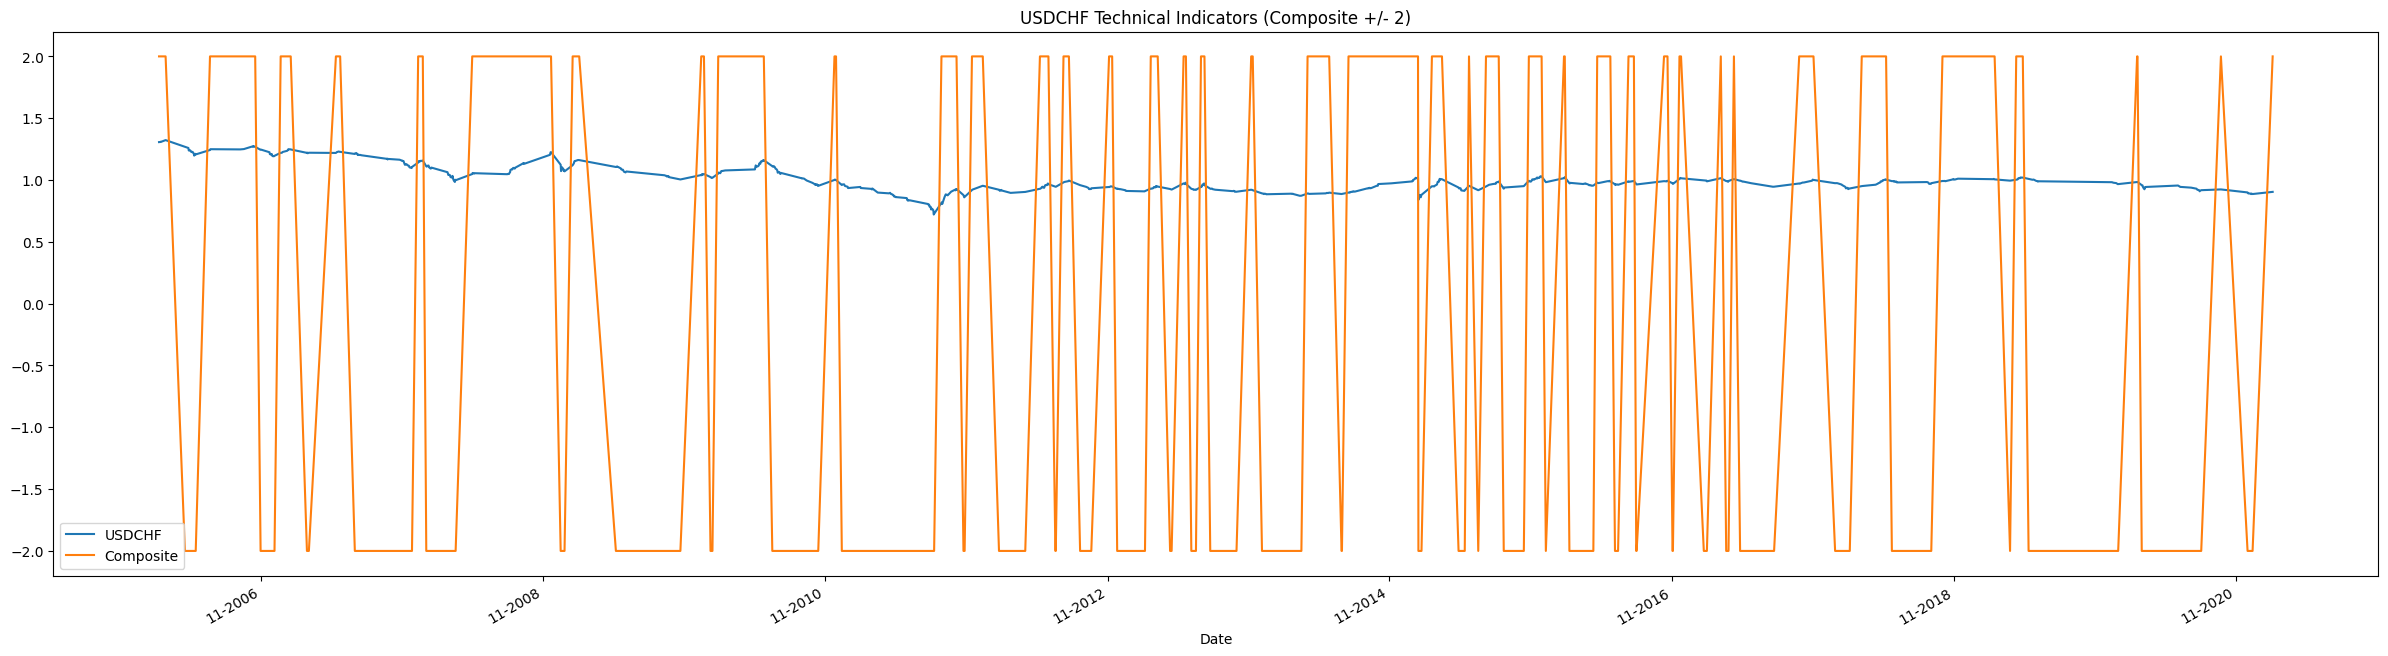

In [14]:
# Filter the data based on the Composite column
df_filtered = df[(df['Composite'] == 2) | (df['Composite'] == -2)]

# Create a line plot of the USDCHF series and Composite Indicator series
ax = df_filtered.plot(x='Date', y=['USD_CHF', 'Composite'], label=['USDCHF', 'Composite'], figsize=(30,8), title='USDCHF Technical Indicators (Composite +/- 2)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.legend()

The forward 5-day returns of USDCHF refer to the price movement of the currency pair over the next five days following the date of the data used in the analysis. Positive returns indicate that the price increased, while negative returns indicate that the price decreased over the next five days.

RSI (Relative Strength Index) is a momentum indicator that measures the strength of price movements of a security over a specific period of time. It oscillates between 0 and 100 and is typically used to identify overbought and oversold conditions. Values above 70 indicate overbought conditions, while values below 40 indicate oversold conditions.

CCI (Commodity Channel Index) is a momentum indicator that measures the relationship between a security's price and its statistical mean. It oscillates between -100 and +100 and is typically used to identify overbought and oversold conditions. Values above +100 indicate overbought conditions, while values below -50 indicate oversold conditions.

The Composite Indicator is a combination of RSI and CCI, which assigns a score of +2, +1, 0, -1, or -2 depending on the values of RSI and CCI. A score of +2 means that both RSI and CCI indicate overbought conditions, while a score of -2 means that both indicate oversold conditions. A score of 0 means that neither indicates overbought or oversold conditions, while scores of +1 or -1 indicate that only one of the indicators indicates overbought or oversold conditions.

When the Composite Indicator is at +2, it may suggest that USDCHF is in an overbought condition, which could potentially lead to a downward price movement over the next five days. Conversely, when the Composite Indicator is at -2, it may suggest that USDCHF is in an oversold condition, which could potentially lead to an upward price movement over the next five days.

The Composite Indicator can provide early signals of turning points or movements in USDCHF. From our preliminary investigation, we can see that the price of USDCHF generally moves in accordance to the Composite Indicator. The composite indicator seems to provide early signals of turning points or movements in USDCHF, meaning if it increases, USDCHF will increase as well and vice versa. In scenarios (11-2014) where USDCHF experiences a slight price increase, but the Composite Indicator remains at +2. This could suggest that the upward movement is temporary, and a more significant downward price movement may be on the horizon

In [15]:
returns_filtered = calculate_returns(df_filtered['USD_CHF'], 5)

# Calculate the overall 5-day returns
returns_overall = calculate_returns(df['USD_CHF'], 5)


In [16]:
df['returns_overall'] = returns_overall
df['returns_filtered'] = returns_filtered
print(df.head())
df.to_excel('3a_final.xlsx', index=None)


        Date  USD_CHF  RSI  CCI  Composite  returns_overall  returns_filtered
0 2006-01-02   1.3146  NaN  NaN        0.0        -0.029591               NaN
1 2006-01-03   1.2904  NaN  NaN        0.0        -0.007672               NaN
2 2006-01-04   1.2768  NaN  NaN        0.0        -0.000783               NaN
3 2006-01-05   1.2758  NaN  NaN        0.0         0.007446               NaN
4 2006-01-06   1.2702  NaN  NaN        0.0         0.005117               NaN


In [17]:
print("Overall Returns: " + str(returns_overall.mean()))
print("Filtered Returns: " + str(returns_filtered.mean()))

Overall Returns: -0.0003138118557903113
Filtered Returns: -0.001873266064212596


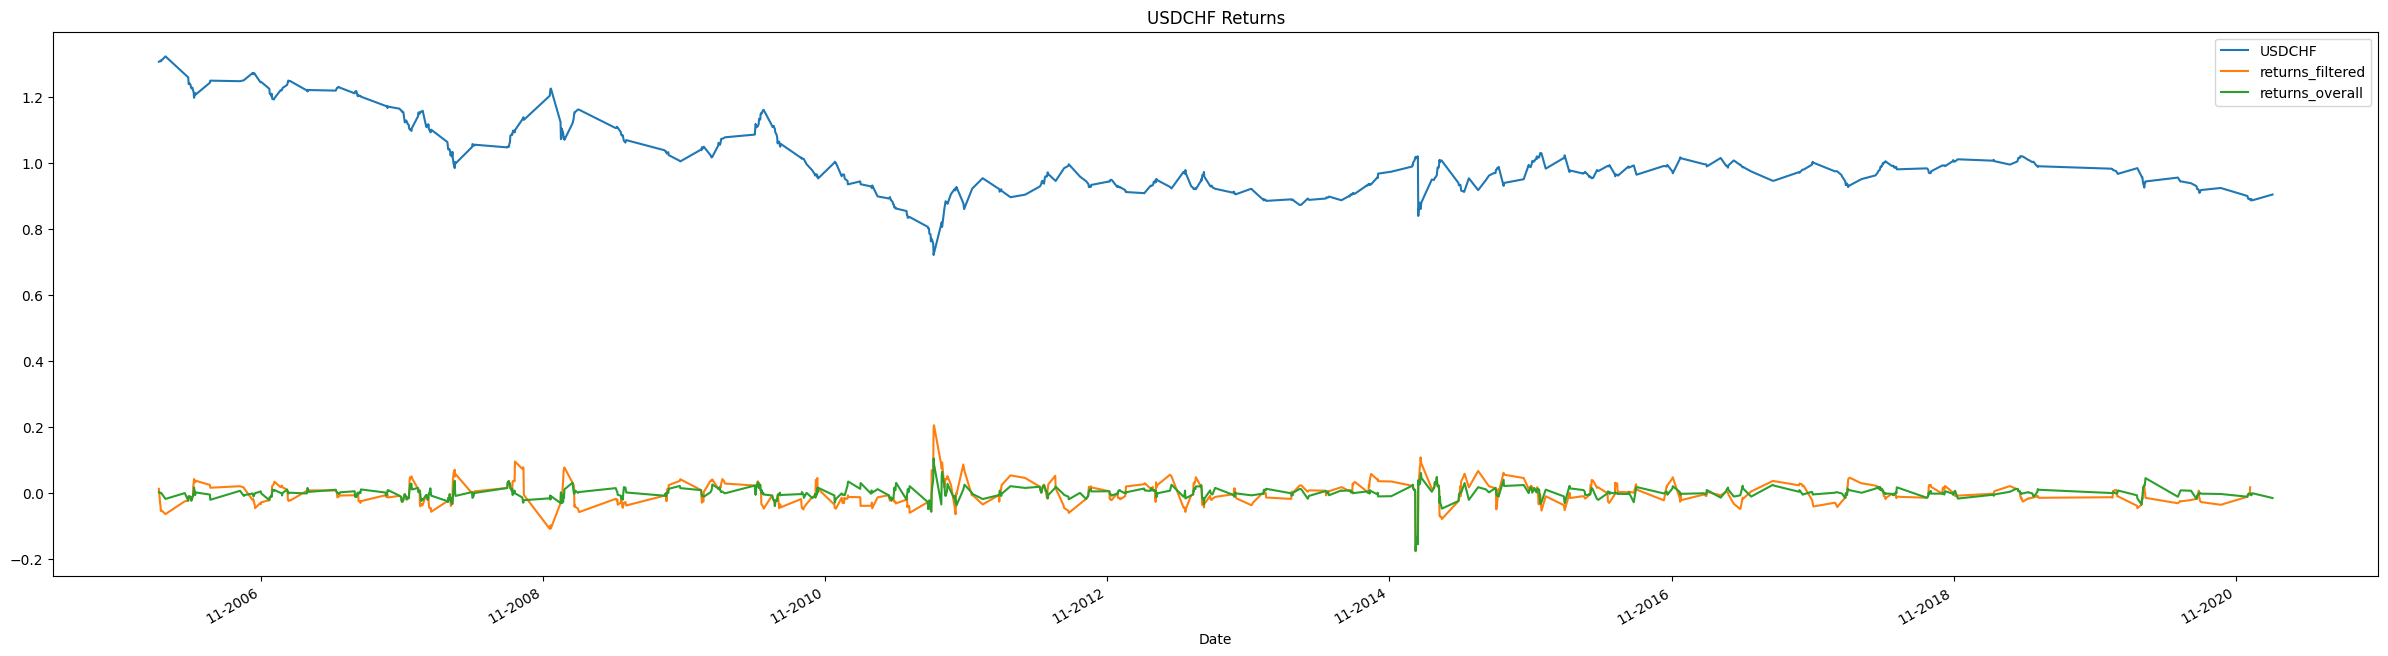

In [18]:
# Filter the data based on the Composite column
df_filtered = df[(df['Composite'] == 2) | (df['Composite'] == -2)]

# Create a line plot of the USDCHF series and Composite Indicator series
ax = df_filtered.plot(x='Date', y=['USD_CHF', 'returns_filtered', 'returns_overall'], label=['USDCHF', 'returns_filtered', 'returns_overall'], figsize=(30,8), title='USDCHF Returns')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
plt.legend()

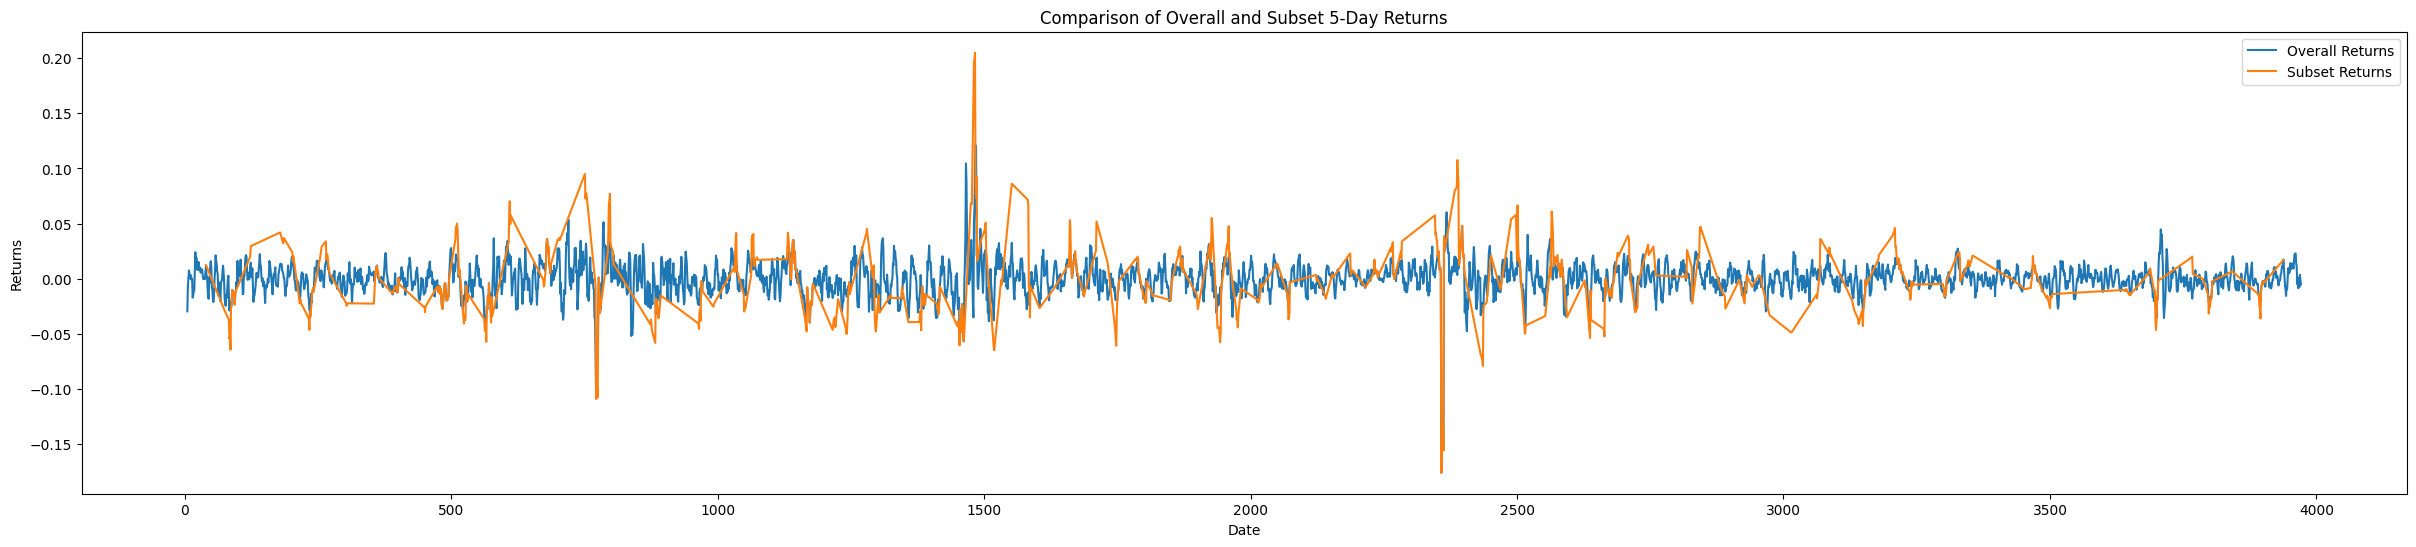

Average overall returns: -0.0003044218444059695
Average subset returns: -0.0018732660642125935


In [19]:
# Calculate overall 5-day returns
overall_returns = USD_CHF.pct_change(periods=5)

# Subset data to only include periods where Composite Indicator is +2 or -2
subset_data = df[(df['Composite'] == 2) | (df['Composite'] == -2)]
subset_returns = subset_data['USD_CHF'].pct_change(periods=5)

# Plot the two returns
plt.figure(figsize=(30,6))
plt.plot(overall_returns.index, overall_returns, label='Overall Returns')
plt.plot(subset_returns.index, subset_returns, label='Subset Returns')
plt.title('Comparison of Overall and Subset 5-Day Returns')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.legend()
plt.show()

# Print the average returns for each period
print('Average overall returns:', overall_returns.mean())
print('Average subset returns:', subset_returns.mean())


The analysis of USDCHF and its Composite Indicator suggests that there is a strong correlation between the movements of the Composite Indicator and USDCHF price. The returns_filtered and price movement of USDCHF also seem to be aligned. However, the absence of extended periods with consistently high or low Composite Indicator values indicates that the price tends to range within a zone with strong buyers and sellers.

Furthermore, comparing the overall and 5-day returns shows that the average subset returns are lower than the average overall returns. This finding implies that when the Composite Indicator is at +2 or -2, USDCHF is more likely to experience lower returns than the overall market. Thus, the signals provided by the Composite Indicator may have been effective in predicting the direction of the market.

# Rolling 100-day z-score

In [20]:
z_score = rolling_zscore(USD_CHF, 100)

In [21]:
df['z_score'] = z_score
print(df.head())

        Date  USD_CHF  RSI  CCI  Composite  returns_overall  returns_filtered  \
0 2006-01-02   1.3146  NaN  NaN        0.0        -0.029591               NaN   
1 2006-01-03   1.2904  NaN  NaN        0.0        -0.007672               NaN   
2 2006-01-04   1.2768  NaN  NaN        0.0        -0.000783               NaN   
3 2006-01-05   1.2758  NaN  NaN        0.0         0.007446               NaN   
4 2006-01-06   1.2702  NaN  NaN        0.0         0.005117               NaN   

   z_score  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  


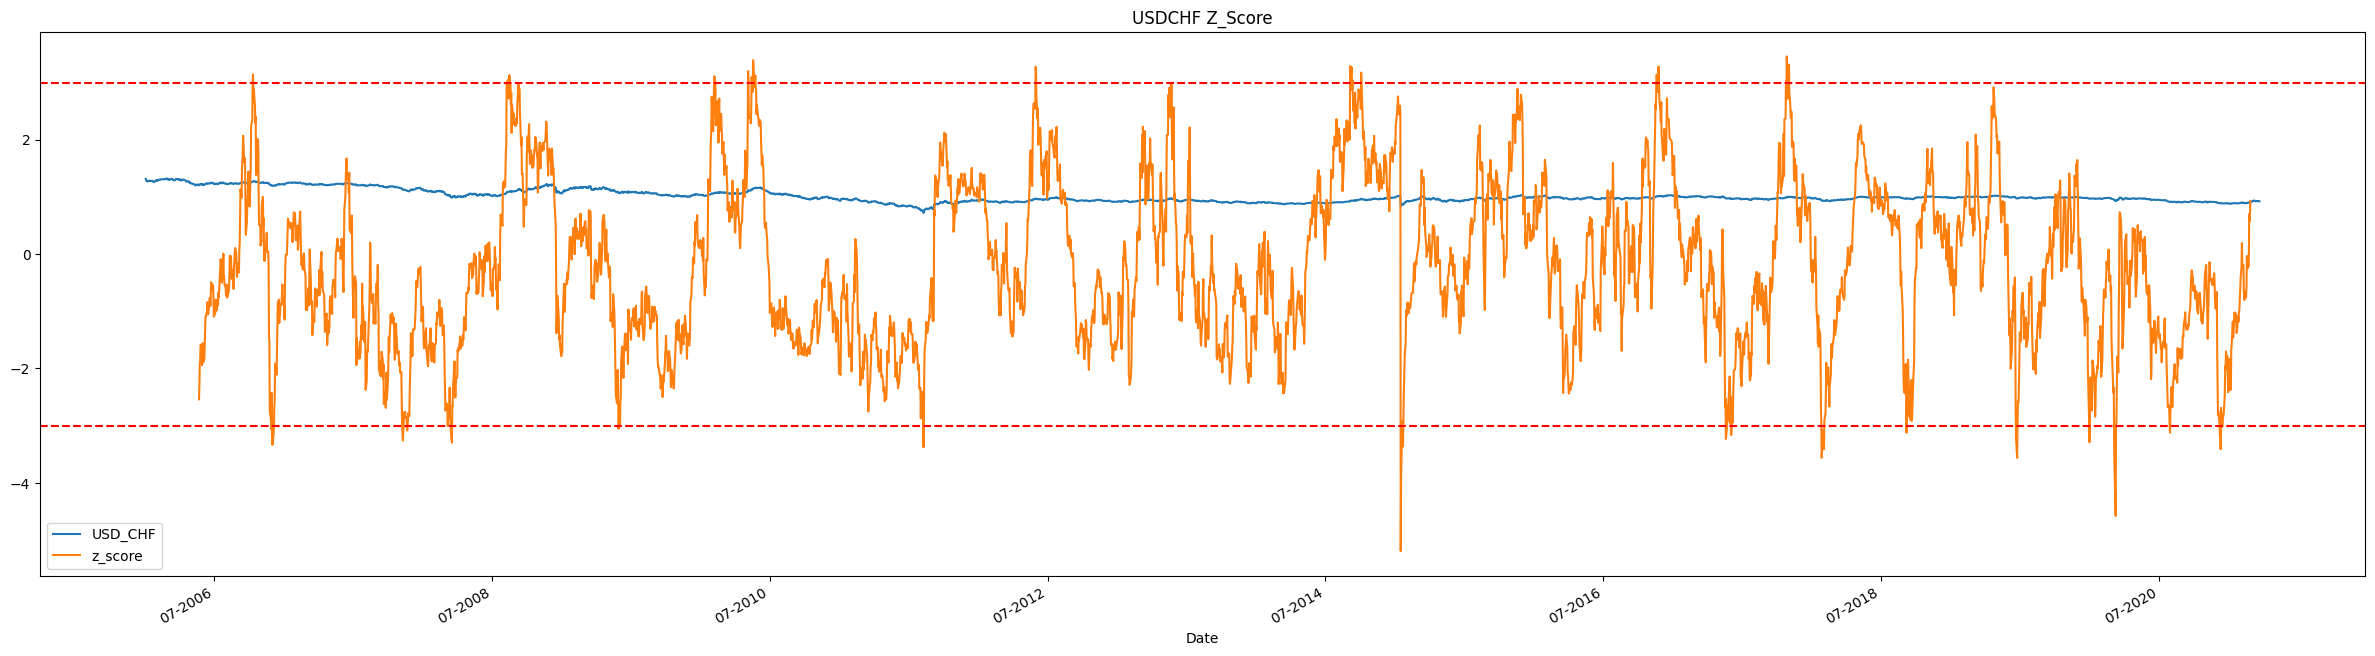

In [22]:
ax = df.plot(x = 'Date', y = ['USD_CHF', 'z_score'], label = ['USD_CHF', 'z_score'], figsize = (30,8), title = 'USDCHF Z_Score')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed
ax.axhline(y=3.0, color='r', linestyle='--')
ax.axhline(y=-3.0, color='r', linestyle='--')
plt.legend()

The plot displays the rolling 100-day z-score for USDCHF, with red lines marking the threshold of +3.0 and -3.0. By examining the plot, we can identify periods where the z-score exceeds +3.0 and take note of the corresponding dates.

In [23]:
high_zscore = df[z_score > 3.0]
print(df.head())

# calculate the forward 5-day returns for these periods
high_zscore['Forward_Returns'] = (high_zscore['USD_CHF'].shift(-5) - high_zscore['USD_CHF']) / high_zscore['USD_CHF']

# compare to the overall 5-day returns of USDCHF
overall_returns = (df['USD_CHF'].shift(-5) - df['USD_CHF']) / df['USD_CHF']

# calculate the average forward returns during high z-score periods
avg_forward_returns = high_zscore['Forward_Returns'].mean()

# calculate the average overall returns
avg_overall_returns = overall_returns.mean()

print('Average forward 5-day returns during high z-score periods: {:.2%}'.format(avg_forward_returns))
print('Average overall 5-day returns: {:.2%}'.format(avg_overall_returns))

        Date  USD_CHF  RSI  CCI  Composite  returns_overall  returns_filtered  \
0 2006-01-02   1.3146  NaN  NaN        0.0        -0.029591               NaN   
1 2006-01-03   1.2904  NaN  NaN        0.0        -0.007672               NaN   
2 2006-01-04   1.2768  NaN  NaN        0.0        -0.000783               NaN   
3 2006-01-05   1.2758  NaN  NaN        0.0         0.007446               NaN   
4 2006-01-06   1.2702  NaN  NaN        0.0         0.005117               NaN   

   z_score  
0      NaN  
1      NaN  
2      NaN  
3      NaN  
4      NaN  
Average forward 5-day returns during high z-score periods: -2.90%
Average overall 5-day returns: -0.03%


C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\4219492801.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_zscore['Forward_Returns'] = (high_zscore['USD_CHF'].shift(-5) - high_zscore['USD_CHF']) / high_zscore['USD_CHF']


C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\1746007855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_zscore["overall_returns"] = overall_returns


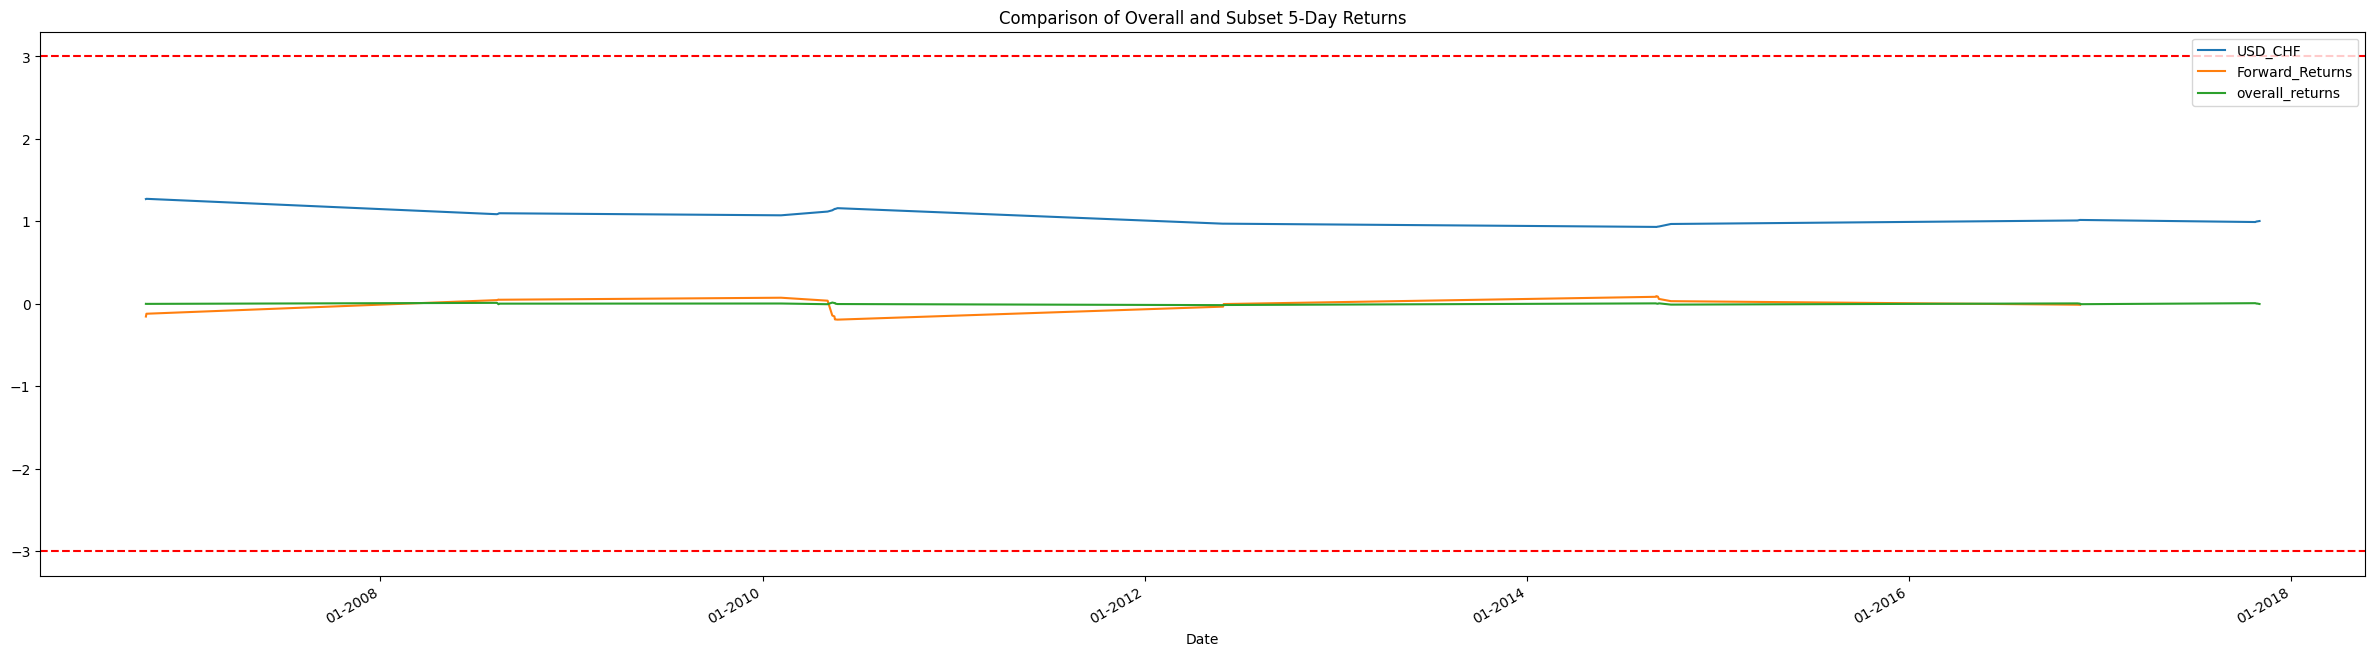

In [24]:
high_zscore["overall_returns"] = overall_returns
ax = high_zscore.plot(x = 'Date', y = ['USD_CHF','Forward_Returns', 'overall_returns'], label = ['USD_CHF','Forward_Returns', 'overall_returns'], figsize = (30,8), title = 'Comparison of Overall and Subset 5-Day Returns')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed
ax.axhline(y=3.0, color='r', linestyle='--')
ax.axhline(y=-3.0, color='r', linestyle='--')
plt.legend()


high_zscore.to_excel("3b.xlsx", index=None)

The rolling 100-day z-score measures the deviation of the current value of USDCHF from the mean of the previous 100 values. If the z-score exceeds +3.0, it suggests that the current value is more than three standard deviations above the mean of the previous 100 values.

Based on the plot and calculation, it appears that during the periods where the z-score is high, the returns for USDCHF are lower than the overall returns most of the time. This finding suggests that USDCHF may have been experiencing a strong downtrend during those periods, which could be attributed to negative economic news or market sentiment.

# Rolling 250-day percentile rank 

In [25]:
rank = rolling_percentile_rank(USD_CHF, 250)

In [26]:
df['rank'] = rank

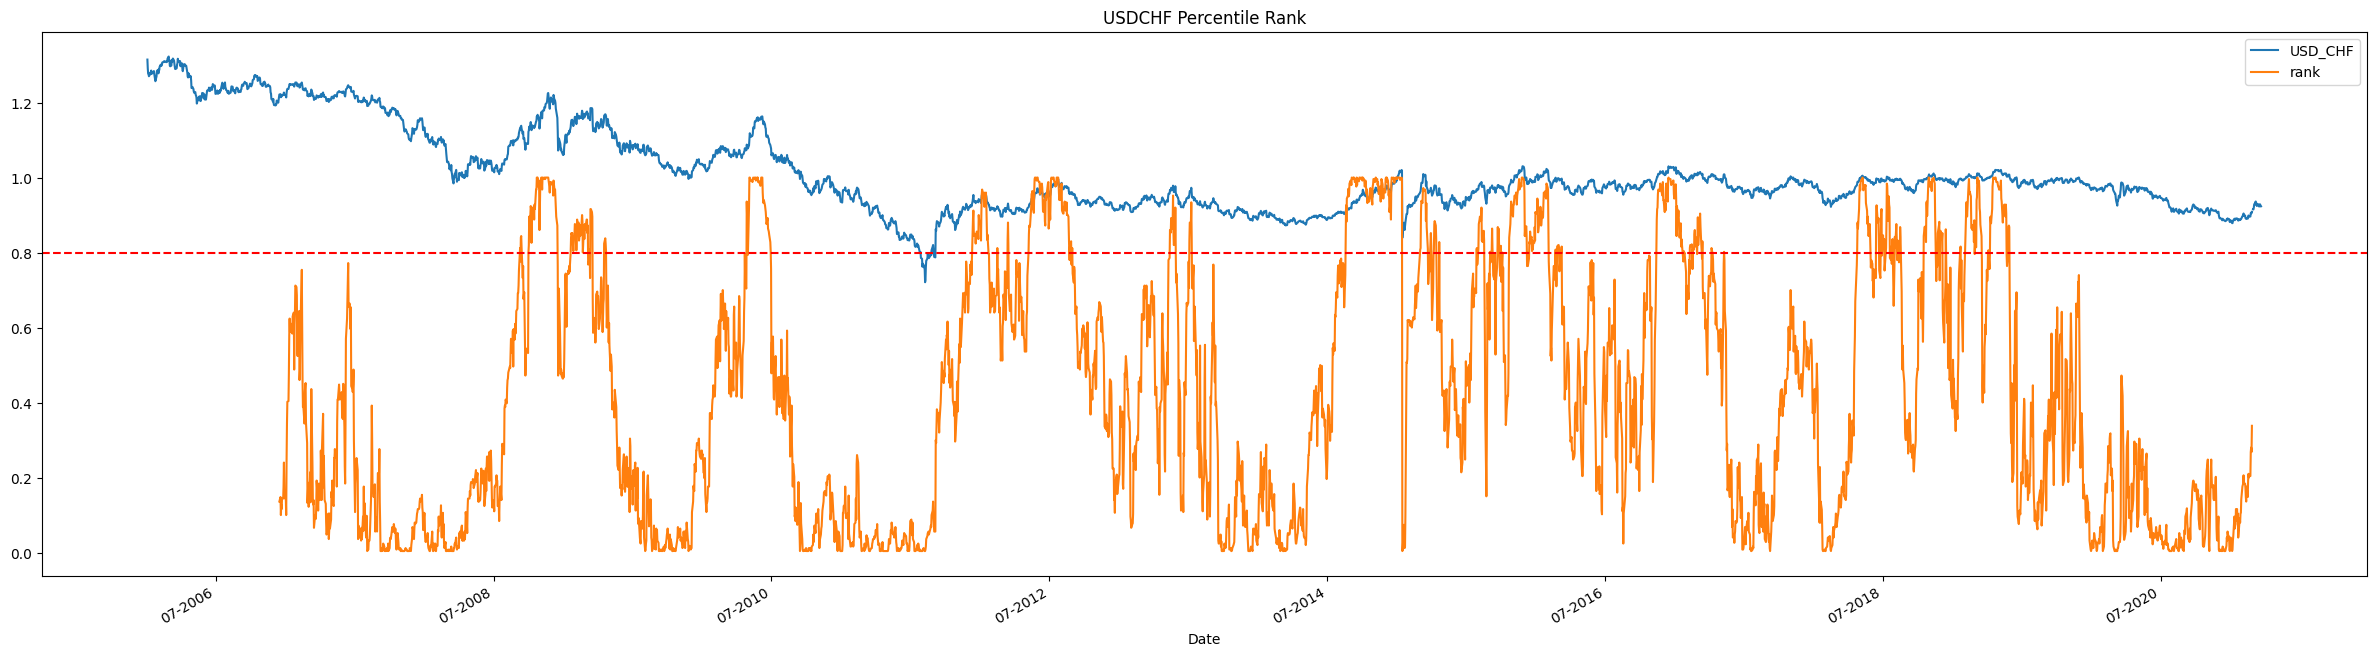

In [27]:
ax = df.plot(x = 'Date', y = ['USD_CHF', 'rank'], label = ['USD_CHF', 'rank'], figsize = (30,8), title = 'USDCHF Percentile Rank')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed
ax.axhline(y=0.8, color='r', linestyle='--')

plt.legend()

The rolling 250-day percentile rank for USDCHF represents the percentage of values in the previous 250 days that are lower than the current value. If the percentile rank exceeds 80%, it means that the current value is higher than 80% of the values observed in the previous 250 days.

Based on the resulting plot, we can identify the periods where the percentile rank exceeds 80%, and take note of the corresponding dates.

C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\2607198753.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["overall_returns"] = returns
C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\2607198753.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["subset_returns"] = subset_returns


Overall returns: count    3967.000000
mean       -0.000304
std         0.014718
min        -0.175962
25%        -0.007813
50%        -0.000104
75%         0.007632
max         0.121147
Name: USD_CHF, dtype: float64
Subset returns: count    729.000000
mean      -0.000616
std        0.018375
min       -0.152009
25%       -0.005599
50%        0.001590
75%        0.007846
max        0.047861
Name: USD_CHF, dtype: float64


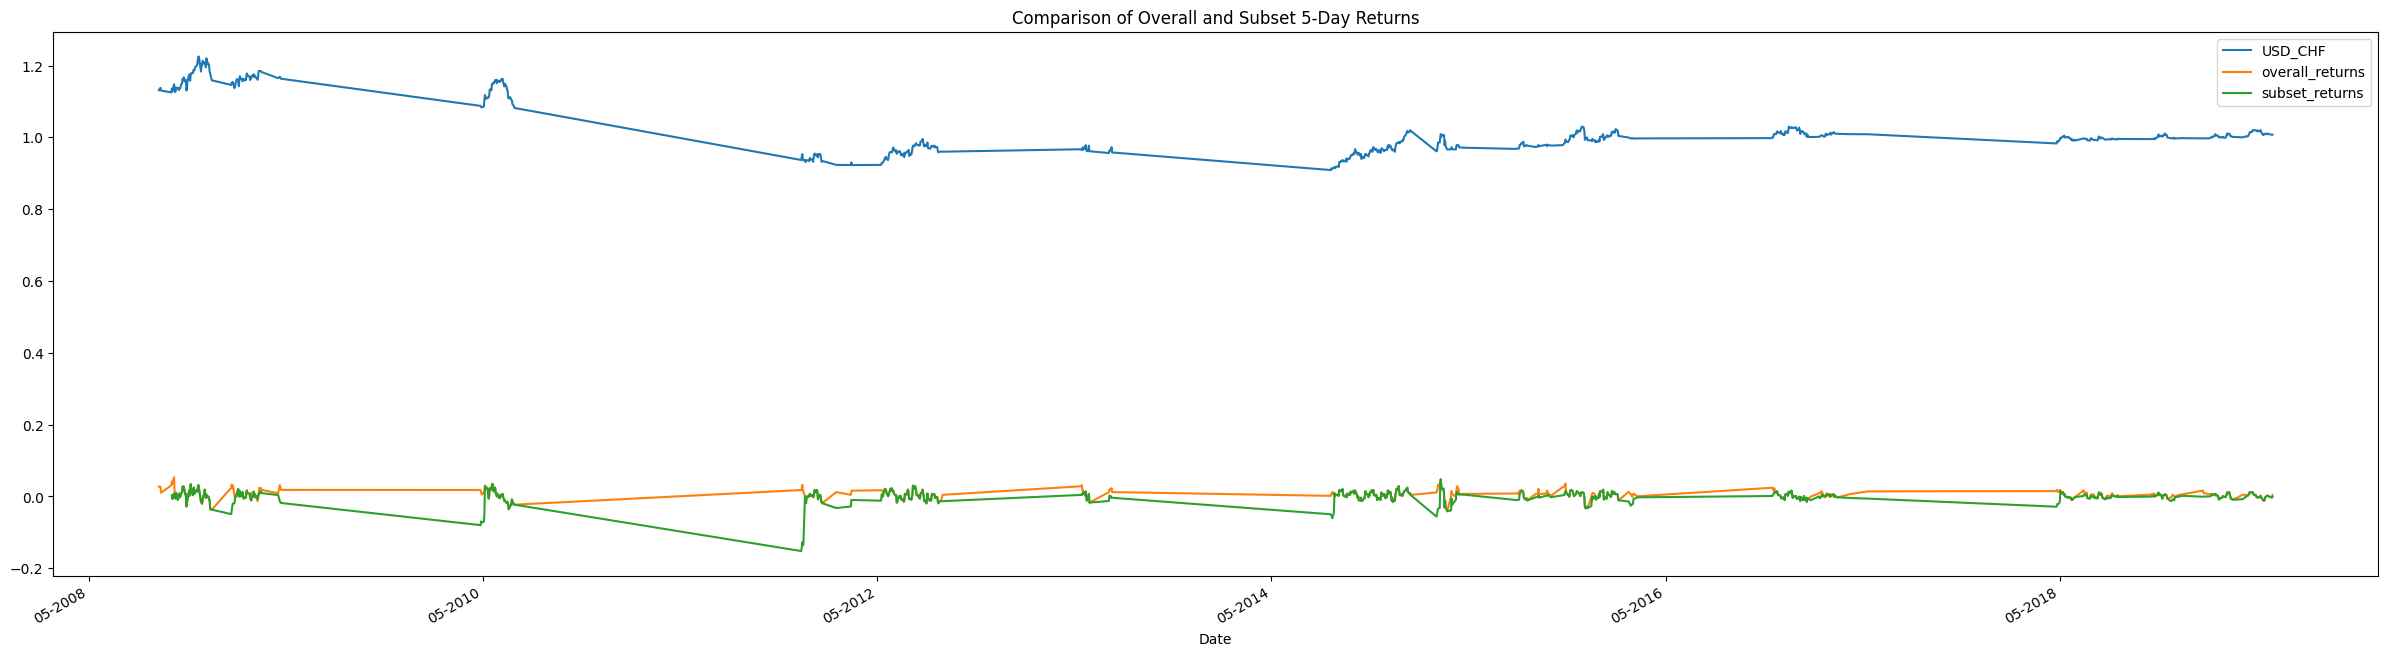

In [28]:

# Calculate forward 5-day returns
returns = df['USD_CHF'].pct_change(periods=5)
# Subset data where percentile rank is above 80%
subset = df[rank > 0.8]

# Calculate forward 5-day returns for subset
subset_returns = subset['USD_CHF'].pct_change(periods=5)
subset["overall_returns"] = returns
subset["subset_returns"] = subset_returns
ax = subset.plot(x = 'Date', y = ['USD_CHF', "overall_returns", "subset_returns"], label = ['USD_CHF', 'overall_returns', 'subset_returns'], figsize = (30,8), title = 'Comparison of Overall and Subset 5-Day Returns')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed

# Print summary statistics
print('Overall returns:', returns.describe())
print('Subset returns:', subset_returns.describe())

To summarize, the rolling 250-day percentile rank can provide insight into whether USD/CHF is trading at historically high or low levels, but in this case, it does not appear to be in an uptrend. Additionally, the overall returns have a higher mean than the subset returns, indicating that the forward 5-day returns of USD/CHF are lower than the overall returns.

# Consolidated EDA

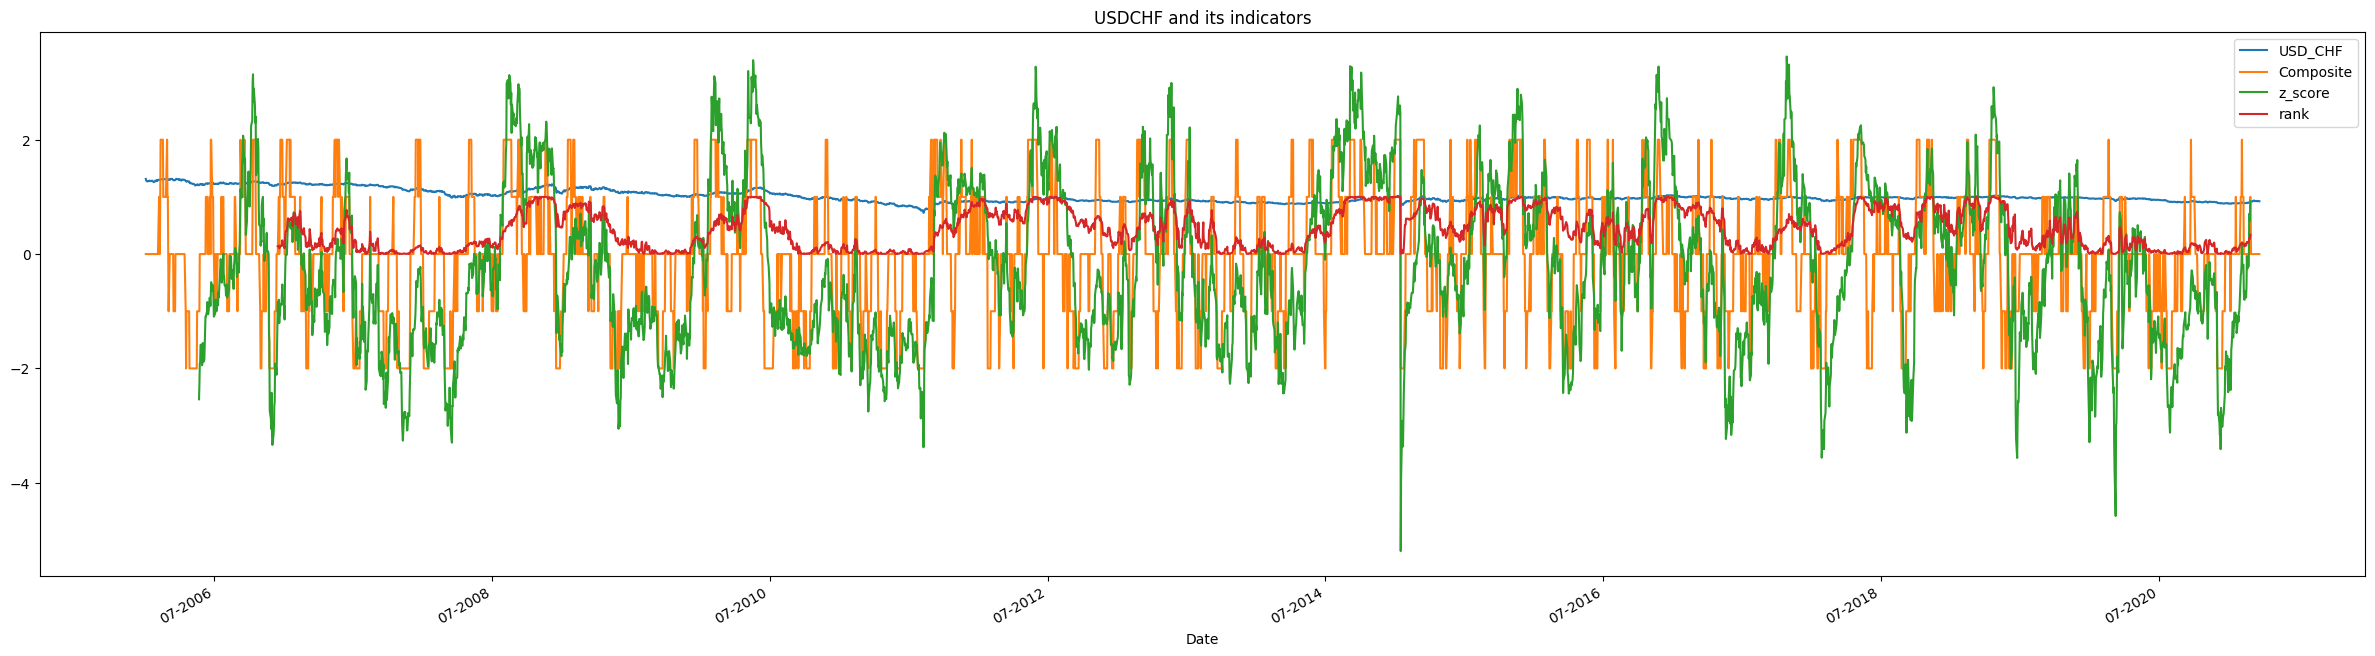

In [29]:
ax = df.plot(x = 'Date', y = ['USD_CHF', 'Composite', 'z_score', 'rank'], label = ['USD_CHF', 'Composite', 'z_score', 'rank'], figsize = (30,8), title = 'USDCHF and its indicators')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed
plt.legend()


In [30]:
df.to_excel("3_final.xlsx", index=None)

# Time Series of Nominal Effective Exchange Rate With The Given Currencies

Required currencies are CAD, CNY, JPY, KRW, MXN, CHF, TWD, GBP,EUR

NEER = (w1 × E1) + (w2 × E2) + ... + (wn × En)

where:

w1, w2, ..., wn = the weights for each currency in the index
E1, E2, ..., En = the nominal exchange rate of the USD against each currency in the index

In [31]:
# Define the URL for the Federal Reserve page
url = 'https://www.federalreserve.gov/releases/h10/weights/default.htm'

# Send a request to the URL and get the HTML response
response = requests.get(url)

# Use BeautifulSoup to parse the HTML response
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table that contains the currency weights
table = soup.find('table')


In [32]:
headers = [header.text for header in table.find_all('th')]
print(headers)

['Country or Region    ', '2023       ', '2022       ', '2021       ', '2020       ', '2019       ', '2018       ', '2017       ', '2016       ', '2015       ', '2014       ', '2013       ', '2012       ', '2011       ', '2010       ', '2009       ', '2008       ', '2007       ', '2006        ']


I am going to modify the headers to fit to our datasets formatting

In [33]:
headers[0] = 'Date' #Change the first index to 'Date'
headers = [s.strip() for s in headers]  #Remove the blank spaces
print(headers)

['Date', '2023', '2022', '2021', '2020', '2019', '2018', '2017', '2016', '2015', '2014', '2013', '2012', '2011', '2010', '2009', '2008', '2007', '2006']


In [34]:
#Get the list of all countries
rows = []
for row in table.find_all('tr'):
    rows.append([cell.text for cell in row.find_all('td')])

# Remove the first empty list
rows = [lst for lst in rows if lst]

# Remove the white spaces within each string
rows = [[s.strip() for s in lst] for lst in rows]

print(rows)

[['*Australia', '1.211', '1.211', '1.211', '1.309', '1.396', '1.414', '1.454', '1.443', '1.539', '1.557', '1.596', '1.749', '1.674', '1.549', '1.639', '1.480', '1.364', '1.309'], ['Argentina', '0.353', '0.353', '0.353', '0.343', '0.439', '0.493', '0.551', '0.524', '0.510', '0.479', '0.530', '0.507', '0.513', '0.469', '0.447', '0.456', '0.380', '0.359'], ['Brazil', '1.714', '1.715', '1.715', '1.625', '1.920', '1.940', '2.009', '1.902', '2.079', '2.338', '2.426', '2.428', '2.448', '2.194', '2.051', '2.114', '1.857', '1.779'], ['*Canada', '13.104', '13.109', '13.109', '12.971', '13.325', '13.462', '13.666', '13.867', '14.062', '15.120', '15.515', '15.645', '15.883', '16.078', '15.844', '17.406', '18.089', '18.613'], ['China', '14.567', '14.573', '14.573', '14.704', '13.697', '15.779', '16.022', '15.630', '15.861', '15.645', '15.564', '15.099', '14.798', '14.848', '14.035', '13.009', '12.839', '12.326'], ['Chile', '0.723', '0.723', '0.723', '0.605', '0.651', '0.651', '0.633', '0.621', '0.6

In [35]:
#Get all the countries name into a list
countries = [row.pop(0).strip('*') for row in rows]
print(countries)

['Australia', 'Argentina', 'Brazil', 'Canada', 'China', 'Chile', 'Colombia', 'Hong Kong', 'Indonesia', 'India', 'Israel', 'Japan', 'Korea', 'Malaysia', 'Mexico', 'Philippines', 'Russia', 'Saudi Arabia', 'Sweden', 'Singapore', 'Switzerland', 'Taiwan', 'Thailand', 'United Kingdom', 'Vietnam', 'Euro Area', 'TOTAL']


In [36]:
weights = pd.DataFrame(rows).T
weights.columns = countries #Assign the columns as the countries name
headers = headers[1:]
weights.insert(loc=0, column='Year', value=headers)
print(weights.head())

   Year Australia Argentina Brazil  Canada   China  Chile Colombia Hong Kong  \
0  2023     1.211     0.353  1.714  13.104  14.567  0.723    0.640     1.177   
1  2022     1.211     0.353  1.715  13.109  14.573  0.723    0.640     1.177   
2  2021     1.211     0.353  1.715  13.109  14.573  0.723    0.640     1.177   
3  2020     1.309     0.343  1.625  12.971  14.704  0.605    0.531     1.266   
4  2019     1.396     0.439  1.920  13.325  13.697  0.651    0.621     1.318   

  Indonesia  ... Saudi Arabia Sweden Singapore Switzerland Taiwan Thailand  \
0     0.744  ...        0.466  0.588     2.008       3.046  2.652    1.275   
1     0.745  ...        0.467  0.588     2.009       3.047  2.653    1.275   
2     0.745  ...        0.467  0.588     2.009       3.047  2.653    1.275   
3     0.691  ...        0.521  0.577     2.126       3.327  2.482    1.228   
4     0.664  ...        0.512  0.554     1.898       2.814  2.143    1.086   

  United Kingdom Vietnam Euro Area TOTAL  
0      

In [37]:
#weights.set_index('Date', inplace=True)

In [38]:
weights.to_excel("weights.xlsx", index=None)


In [39]:
required_countries = ['Canada', 'China', 'Japan', 'Korea', 'Mexico', 'Switzerland', 'Taiwan', 'United Kingdom', 'Euro Area']

We can see that there is an additional USDJPY column at the end. We will remove this before moving forward as this is an anomaly as USDJPY has been in the 100s range since 2006

In [40]:
currencies = task_1.drop(columns=task_1.columns[-1])

In [41]:
print(currencies["date"])

0      2006-01-02
1      2006-01-03
2      2006-01-04
3      2006-01-05
4      2006-01-06
          ...    
3967   2021-03-16
3968   2021-03-17
3969   2021-03-18
3970   2021-03-19
3971   2021-03-22
Name: date, Length: 3972, dtype: datetime64[ns]


In [42]:
#Modify the format of the datetime
currencies['Year'] = currencies['date'].dt.strftime('%Y')

In [43]:
print(currencies["Year"])

0       2006
1       2006
2       2006
3       2006
4       2006
        ... 
3967    2021
3968    2021
3969    2021
3970    2021
3971    2021
Name: Year, Length: 3972, dtype: object


In [44]:
#Move it to the front of the dataframe
year_column = currencies.pop('Year')
currencies.insert(0, 'Year', year_column)

Next, we get the required countries.
We also add a Year column to our FX data for easier mapping

In [45]:

new_cols = ["Year", "date"] + required_countries
country_df = currencies
country_df.columns = new_cols
country_df.head()


Year       date  Canada   China   Japan    Korea   Mexico  Switzerland  \
0  2006 2006-01-02  1.1635  8.0702  117.88  1007.95  10.6360       1.3146   
1  2006 2006-01-03  1.1561  8.0702  116.17  1002.85  10.6278       1.2904   
2  2006 2006-01-04  1.1479  8.0676  116.10   998.10  10.5820       1.2768   
3  2006 2006-01-05  1.1621  8.0657  115.93   987.35  10.6323       1.2758   
4  2006 2006-01-06  1.1657  8.0668  114.44   987.90  10.5624       1.2702   

   Taiwan  United Kingdom  Euro Area  
0  32.810          0.5813     0.8461  
1  32.640          0.5727     0.8321  
2  32.335          0.5687     0.8252  
3  32.008          0.5695     0.8258  
4  32.194          0.5648     0.8229

In [46]:
#Check for Null values
country_df.isna().any().any()

True

The presense of null values suggest that there is no FX data for certain instruments on that day. I will not replace the Null values with 0 as this will affect the calculated NEER, which is dependent on the FX and weight value. Omitting it will result in a lower total weight that is included in the calculation


In [47]:

required_columns = ["Year"] + required_countries
filtered_weights = weights.loc[:, required_columns]
filtered_weights.head()


Year  Canada   China  Japan  Korea  Mexico Switzerland Taiwan  \
0  2023  13.104  14.567  5.490  3.594  13.784       3.046  2.652   
1  2022  13.109  14.573  5.492  3.595  13.790       3.047  2.653   
2  2021  13.109  14.573  5.492  3.595  13.790       3.047  2.653   
3  2020  12.971  14.704  5.988  3.500  13.172       3.327  2.482   
4  2019  13.325  13.697  6.367  3.274  13.639       2.814  2.143   

  United Kingdom Euro Area  
0          4.654    19.325  
1          4.656    19.290  
2          4.656    19.290  
3          4.980    19.740  
4          5.442    20.193

The total weights of our currencies do not add up to 1, hence the NEER would not be a properly weighted average of the exchange rates of the currencies in the basket

Since the weights are not normalized, the resultng NEER might be affected by the absolute values of the weights rather than their relative percentages

The next steps normalizes the weights to ensure that the NEER is a properly weighted average of the exchange rates of the currencies in the basket.
Normalizing the weights means that they are rescaled so that they add up to 1. 

By normalizing the weights, we can ensure that each currency is given the correct relative importance in the NEER calculation, and that the resulting NEER reflects the exchange rate movements of the basket as a whole, rather than being skewed towards certain currencies. This makes the NEER a more accurate measure of the overall exchange rate movements of the basket of currencies.



In [48]:
normalized_weights = filtered_weights.copy()

In [49]:
numeric_columns = ['Canada', 'China', 'Japan', 'Korea', 'Mexico', 'Switzerland', 'Taiwan', 'United Kingdom', 'Euro Area']
normalized_weights[numeric_columns] = normalized_weights[numeric_columns].apply(pd.to_numeric)

# Create a new column that is the sum of the columns Canada, China, Japan, Korea, Mexico, Switzerland, Taiwan, United Kingdom, and Euro Area
normalized_weights['Total'] = normalized_weights[numeric_columns].sum(axis=1)

In [50]:
normalized_weights.head()

Year  Canada   China  Japan  Korea  Mexico  Switzerland  Taiwan  \
0  2023  13.104  14.567  5.490  3.594  13.784        3.046   2.652   
1  2022  13.109  14.573  5.492  3.595  13.790        3.047   2.653   
2  2021  13.109  14.573  5.492  3.595  13.790        3.047   2.653   
3  2020  12.971  14.704  5.988  3.500  13.172        3.327   2.482   
4  2019  13.325  13.697  6.367  3.274  13.639        2.814   2.143   

   United Kingdom  Euro Area   Total  
0           4.654     19.325  80.216  
1           4.656     19.290  80.205  
2           4.656     19.290  80.205  
3           4.980     19.740  80.864  
4           5.442     20.193  80.894

In [51]:
normalized_weights['Canada/Total'] = normalized_weights['Canada'].div(normalized_weights['Total'])
normalized_weights['China/Total'] = normalized_weights['China'].div(normalized_weights['Total'])
normalized_weights['Japan/Total'] = normalized_weights['Japan'].div(normalized_weights['Total'])
normalized_weights['Korea/Total'] = normalized_weights['Korea'].div(normalized_weights['Total'])
normalized_weights['Mexico/Total'] = normalized_weights['Mexico'].div(normalized_weights['Total'])
normalized_weights['Switzerland/Total'] = normalized_weights['Switzerland'].div(normalized_weights['Total'])
normalized_weights['Taiwan/Total'] = normalized_weights['Taiwan'].div(normalized_weights['Total'])
normalized_weights['UK/Total'] = normalized_weights['United Kingdom'].div(normalized_weights['Total'])
normalized_weights['Euro Area/Total'] = normalized_weights['Euro Area'].div(normalized_weights['Total'])

# Drop the original country columns
normalized_weights = normalized_weights.drop(['Canada', 'China', 'Japan', 'Korea', 'Mexico', 'Switzerland', 'Taiwan', 'United Kingdom', 'Euro Area'], axis=1)

# Rename the ratio columns to the original column names
normalized_weights = normalized_weights.rename(columns={'Canada/Total': 'Canada', 'China/Total': 'China', 'Japan/Total': 'Japan', 
                   'Korea/Total': 'Korea', 'Mexico/Total': 'Mexico', 'Switzerland/Total': 'Switzerland',
                   'Taiwan/Total': 'Taiwan', 'UK/Total': 'United Kingdom', 'Euro Area/Total': 'Euro Area'})

The above code block normalizes the weights of each currency in the basket by dividing each country's weight by the total weight of the basket. The resulting normalized weights add up to 1, ensuring that the NEER calculation is a properly weighted average of the exchange rates of the currencies in the basket.

Each currency's normalized weight is calculated by dividing its original weight by the total weight, using the div() method. The original weight columns are then dropped from the dataframe using the drop() method with axis=1 to indicate that the columns should be dropped. Finally, the ratio columns are renamed to their original column names using the rename() method and a dictionary mapping the old column names to the new column names.

In [52]:
normalized_weights.head()

Year   Total    Canada     China     Japan     Korea    Mexico  \
0  2023  80.216  0.163359  0.181597  0.068440  0.044804  0.171836   
1  2022  80.205  0.163444  0.181697  0.068475  0.044823  0.171934   
2  2021  80.205  0.163444  0.181697  0.068475  0.044823  0.171934   
3  2020  80.864  0.160405  0.181836  0.074050  0.043283  0.162891   
4  2019  80.894  0.164722  0.169320  0.078708  0.040473  0.168603   

   Switzerland    Taiwan  United Kingdom  Euro Area  
0     0.037972  0.033061        0.058018   0.240912  
1     0.037990  0.033078        0.058051   0.240509  
2     0.037990  0.033078        0.058051   0.240509  
3     0.041143  0.030694        0.061585   0.244114  
4     0.034786  0.026491        0.067273   0.249623

We merge the FX and weights data based on their year
Hence each row entry would contain the FX data and their corresponding weight

In [53]:
merged_df = pd.merge(country_df, normalized_weights, on='Year')

In [54]:
merged_df.head()

Year       date  Canada_x  China_x  Japan_x  Korea_x  Mexico_x  \
0  2006 2006-01-02    1.1635   8.0702   117.88  1007.95   10.6360   
1  2006 2006-01-03    1.1561   8.0702   116.17  1002.85   10.6278   
2  2006 2006-01-04    1.1479   8.0676   116.10   998.10   10.5820   
3  2006 2006-01-05    1.1621   8.0657   115.93   987.35   10.6323   
4  2006 2006-01-06    1.1657   8.0668   114.44   987.90   10.5624   

   Switzerland_x  Taiwan_x  United Kingdom_x  ...  Total  Canada_y   China_y  \
0         1.3146    32.810            0.5813  ...  83.39  0.223204  0.147811   
1         1.2904    32.640            0.5727  ...  83.39  0.223204  0.147811   
2         1.2768    32.335            0.5687  ...  83.39  0.223204  0.147811   
3         1.2758    32.008            0.5695  ...  83.39  0.223204  0.147811   
4         1.2702    32.194            0.5648  ...  83.39  0.223204  0.147811   

    Japan_y   Korea_y  Mexico_y  Switzerland_y  Taiwan_y  United Kingdom_y  \
0  0.108706  0.036887   0.13528       0.021861  0.029608          0.071975   
1  0.108706  0.036887   0.13528       0.021861  0.029608          0.071975   
2  0.108706  0.036887   0.13528       0.021861  0.029608          0.071975   
3  0.108706  0.036887   0.13528       0.021861  0.029608          0.071975   
4  0.108706  0.036887   0.13528       0.021861  0.029608          0.071975   

   Euro Area_y  
0     0.224667  
1     0.224667  
2     0.224667  
3     0.224667  
4     0.224667  

[5 rows x 21 columns]

In [55]:
# Get a list of all the country columns in the dataframe
country_cols = list(country_df.columns)[2:] #start from 2 to exclude 'date'

# Create an empty list to store the results
NEER = []

# Loop through each row of the merged dataframe
for i, row in merged_df.iterrows():
    # Extract the year from the row
    year = row['Year']
    
    # Loop through each country column and calculate the product of the corresponding values from both dataframes
    total = 0
    for col in country_cols:

        total += row[col + '_x'] * (row[col + '_y'])
        
    # Append the result to the results list
    NEER.append(total)

In [56]:
new_currencies = task_1.drop(columns=task_1.columns[-1])
new_currencies["NEER"] = NEER
print(new_currencies.head())

        date  USDCAD Curncy  USDCNY Curncy  USDJPY Curncy  USDKRW Curncy  \
0 2006-01-02         1.1635         8.0702         117.88        1007.95   
1 2006-01-03         1.1561         8.0702         116.17        1002.85   
2 2006-01-04         1.1479         8.0676         116.10         998.10   
3 2006-01-05         1.1621         8.0657         115.93         987.35   
4 2006-01-06         1.1657         8.0668         114.44         987.90   

   USDMXN Curncy  USDCHF Curncy  USDTWD Curncy  USDGBP Curncy  USDEUR Curncy  \
0        10.6360         1.3146         32.810         0.5813         0.8461   
1        10.6278         1.2904         32.640         0.5727         0.8321   
2        10.5820         1.2768         32.335         0.5687         0.8252   
3        10.6323         1.2758         32.008         0.5695         0.8258   
4        10.5624         1.2702         32.194         0.5648         0.8229   

        NEER  
0  54.117948  
1  53.731850  
2  53.529451  
3 

In [57]:
new_currencies.to_excel("FX_NEER.xlsx", index=None)

In [58]:
new_currencies.isna().any().any()

True

Plotting the Time Series of the FX pairs and NEER

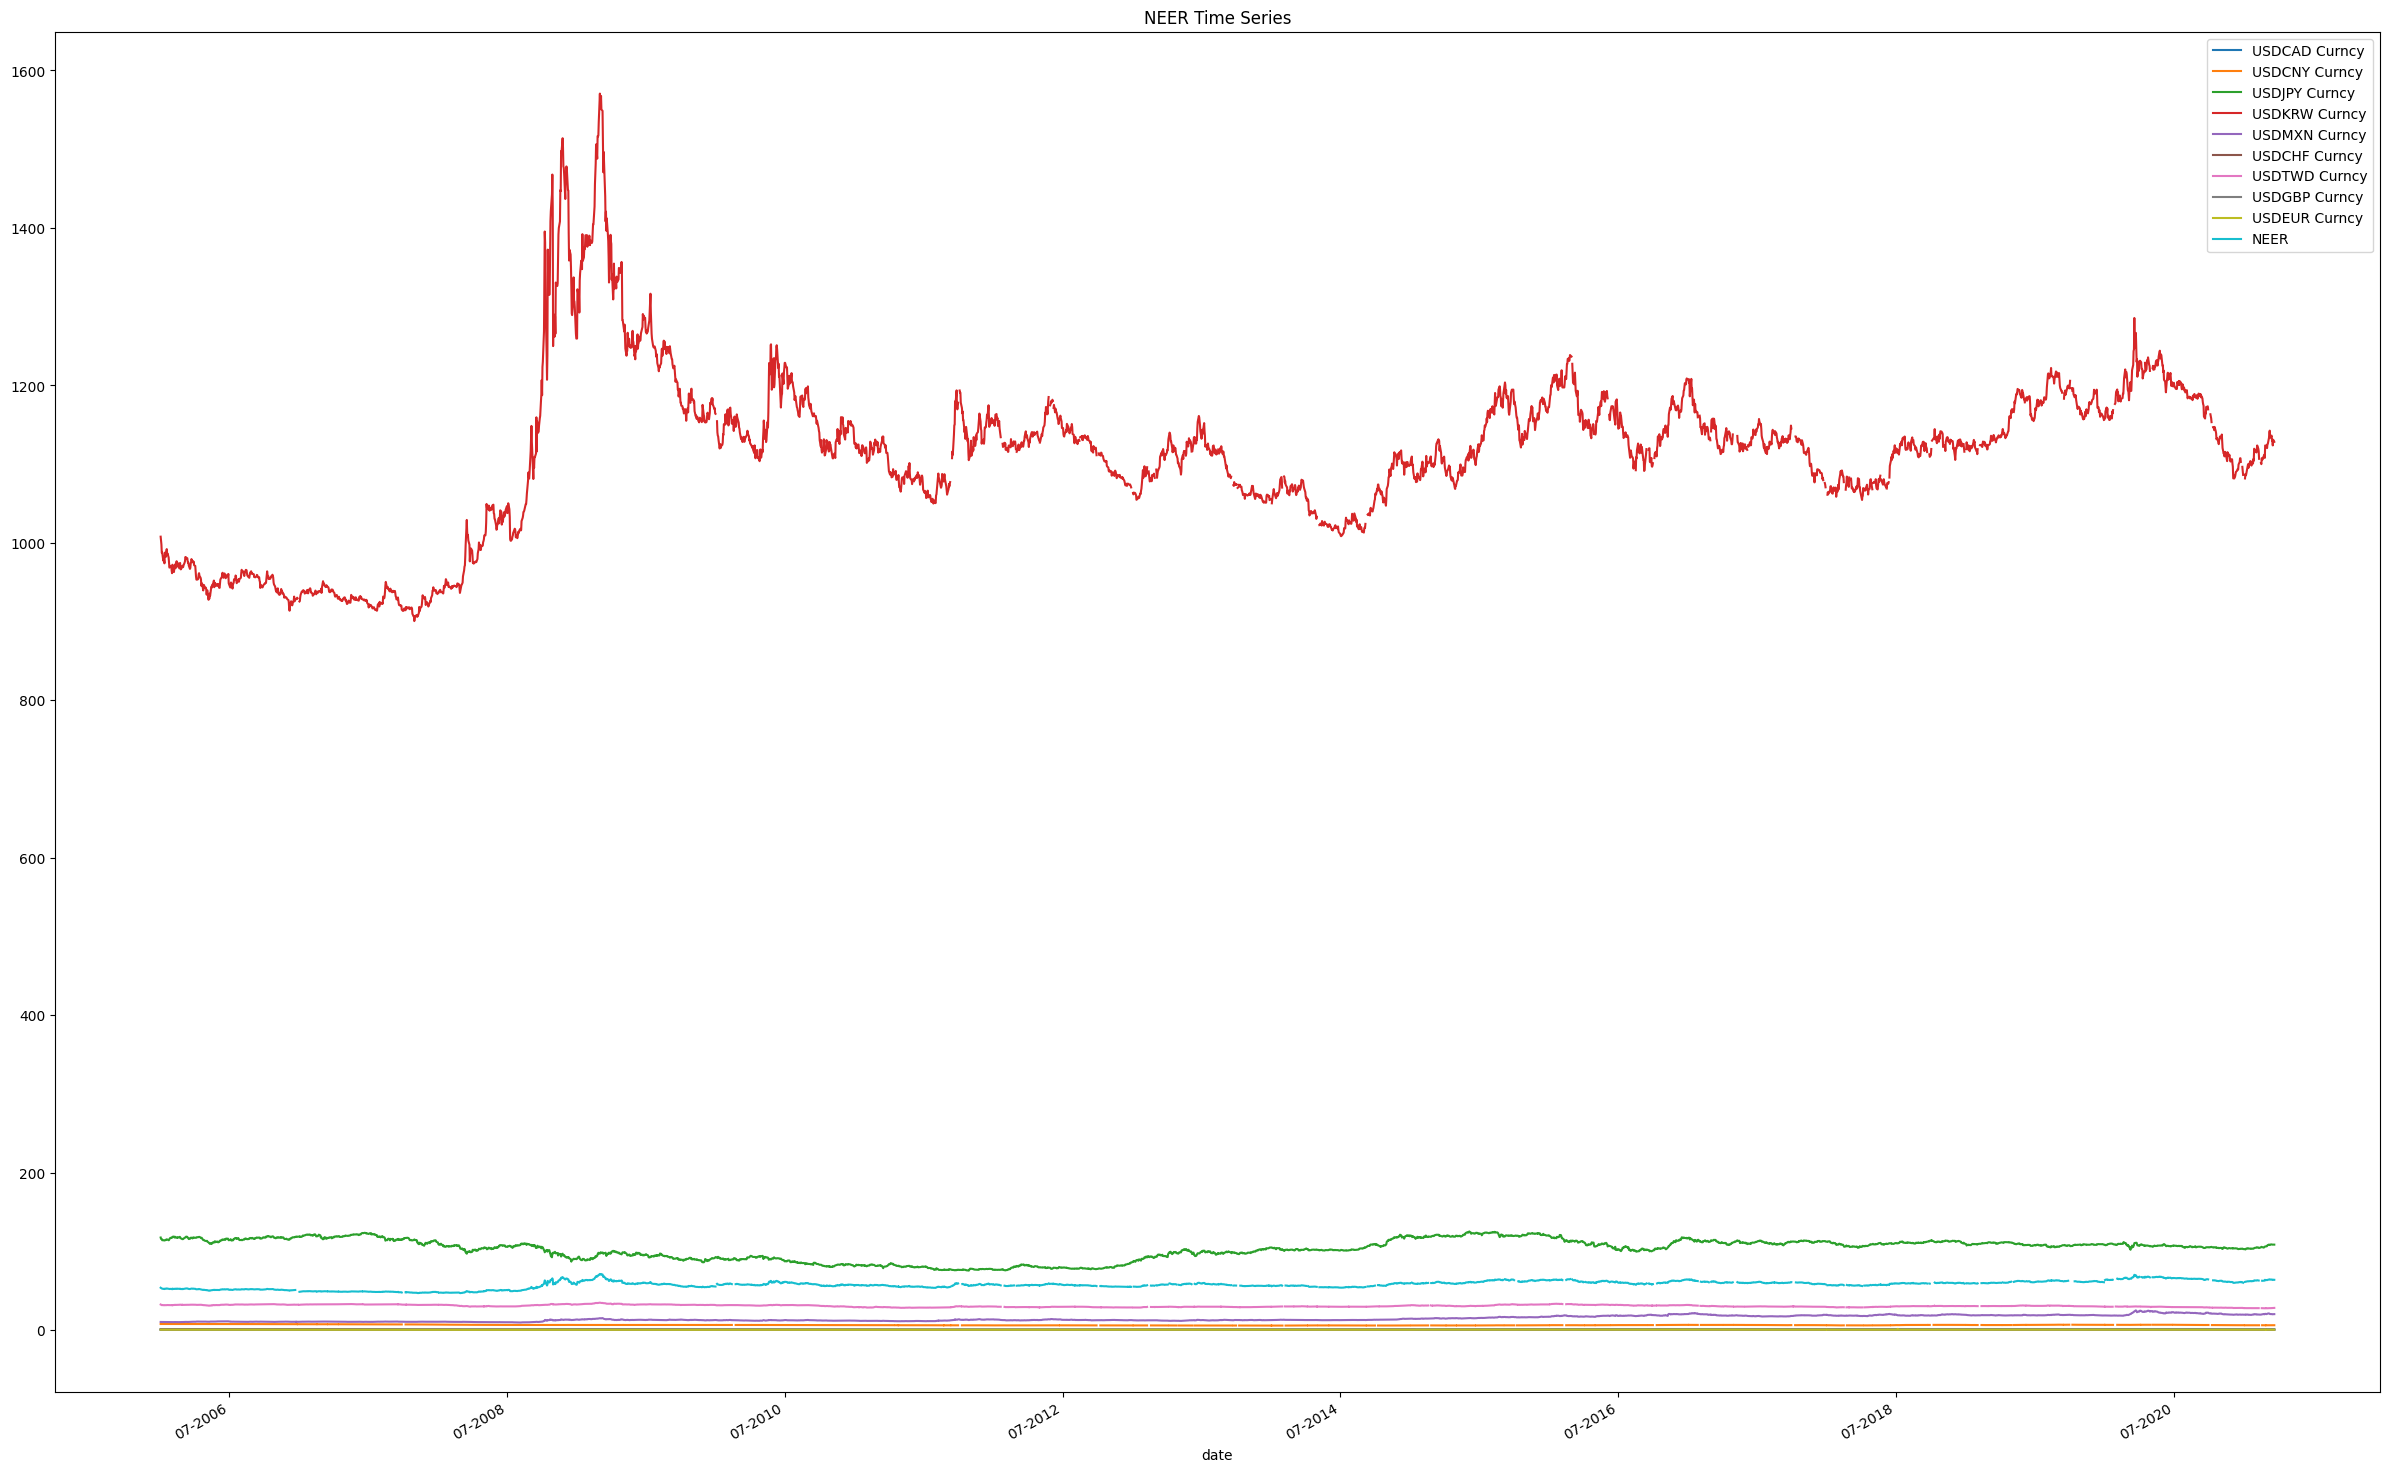

In [59]:
ax = new_currencies.plot(x = 'date', y = ['USDCAD Curncy', 'USDCNY Curncy', 'USDJPY Curncy','USDKRW Curncy','USDMXN Curncy','USDCHF Curncy','USDTWD Curncy','USDGBP Curncy','USDEUR Curncy', 'NEER'], label = ['USDCAD Curncy', 'USDCNY Curncy', 'USDJPY Curncy','USDKRW Curncy','USDMXN Curncy','USDCHF Curncy','USDTWD Curncy','USDGBP Curncy','USDEUR Curncy', 'NEER'], figsize = (30,20), title = 'NEER Time Series')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed

I will remove KRW in the next plot for better visualisation

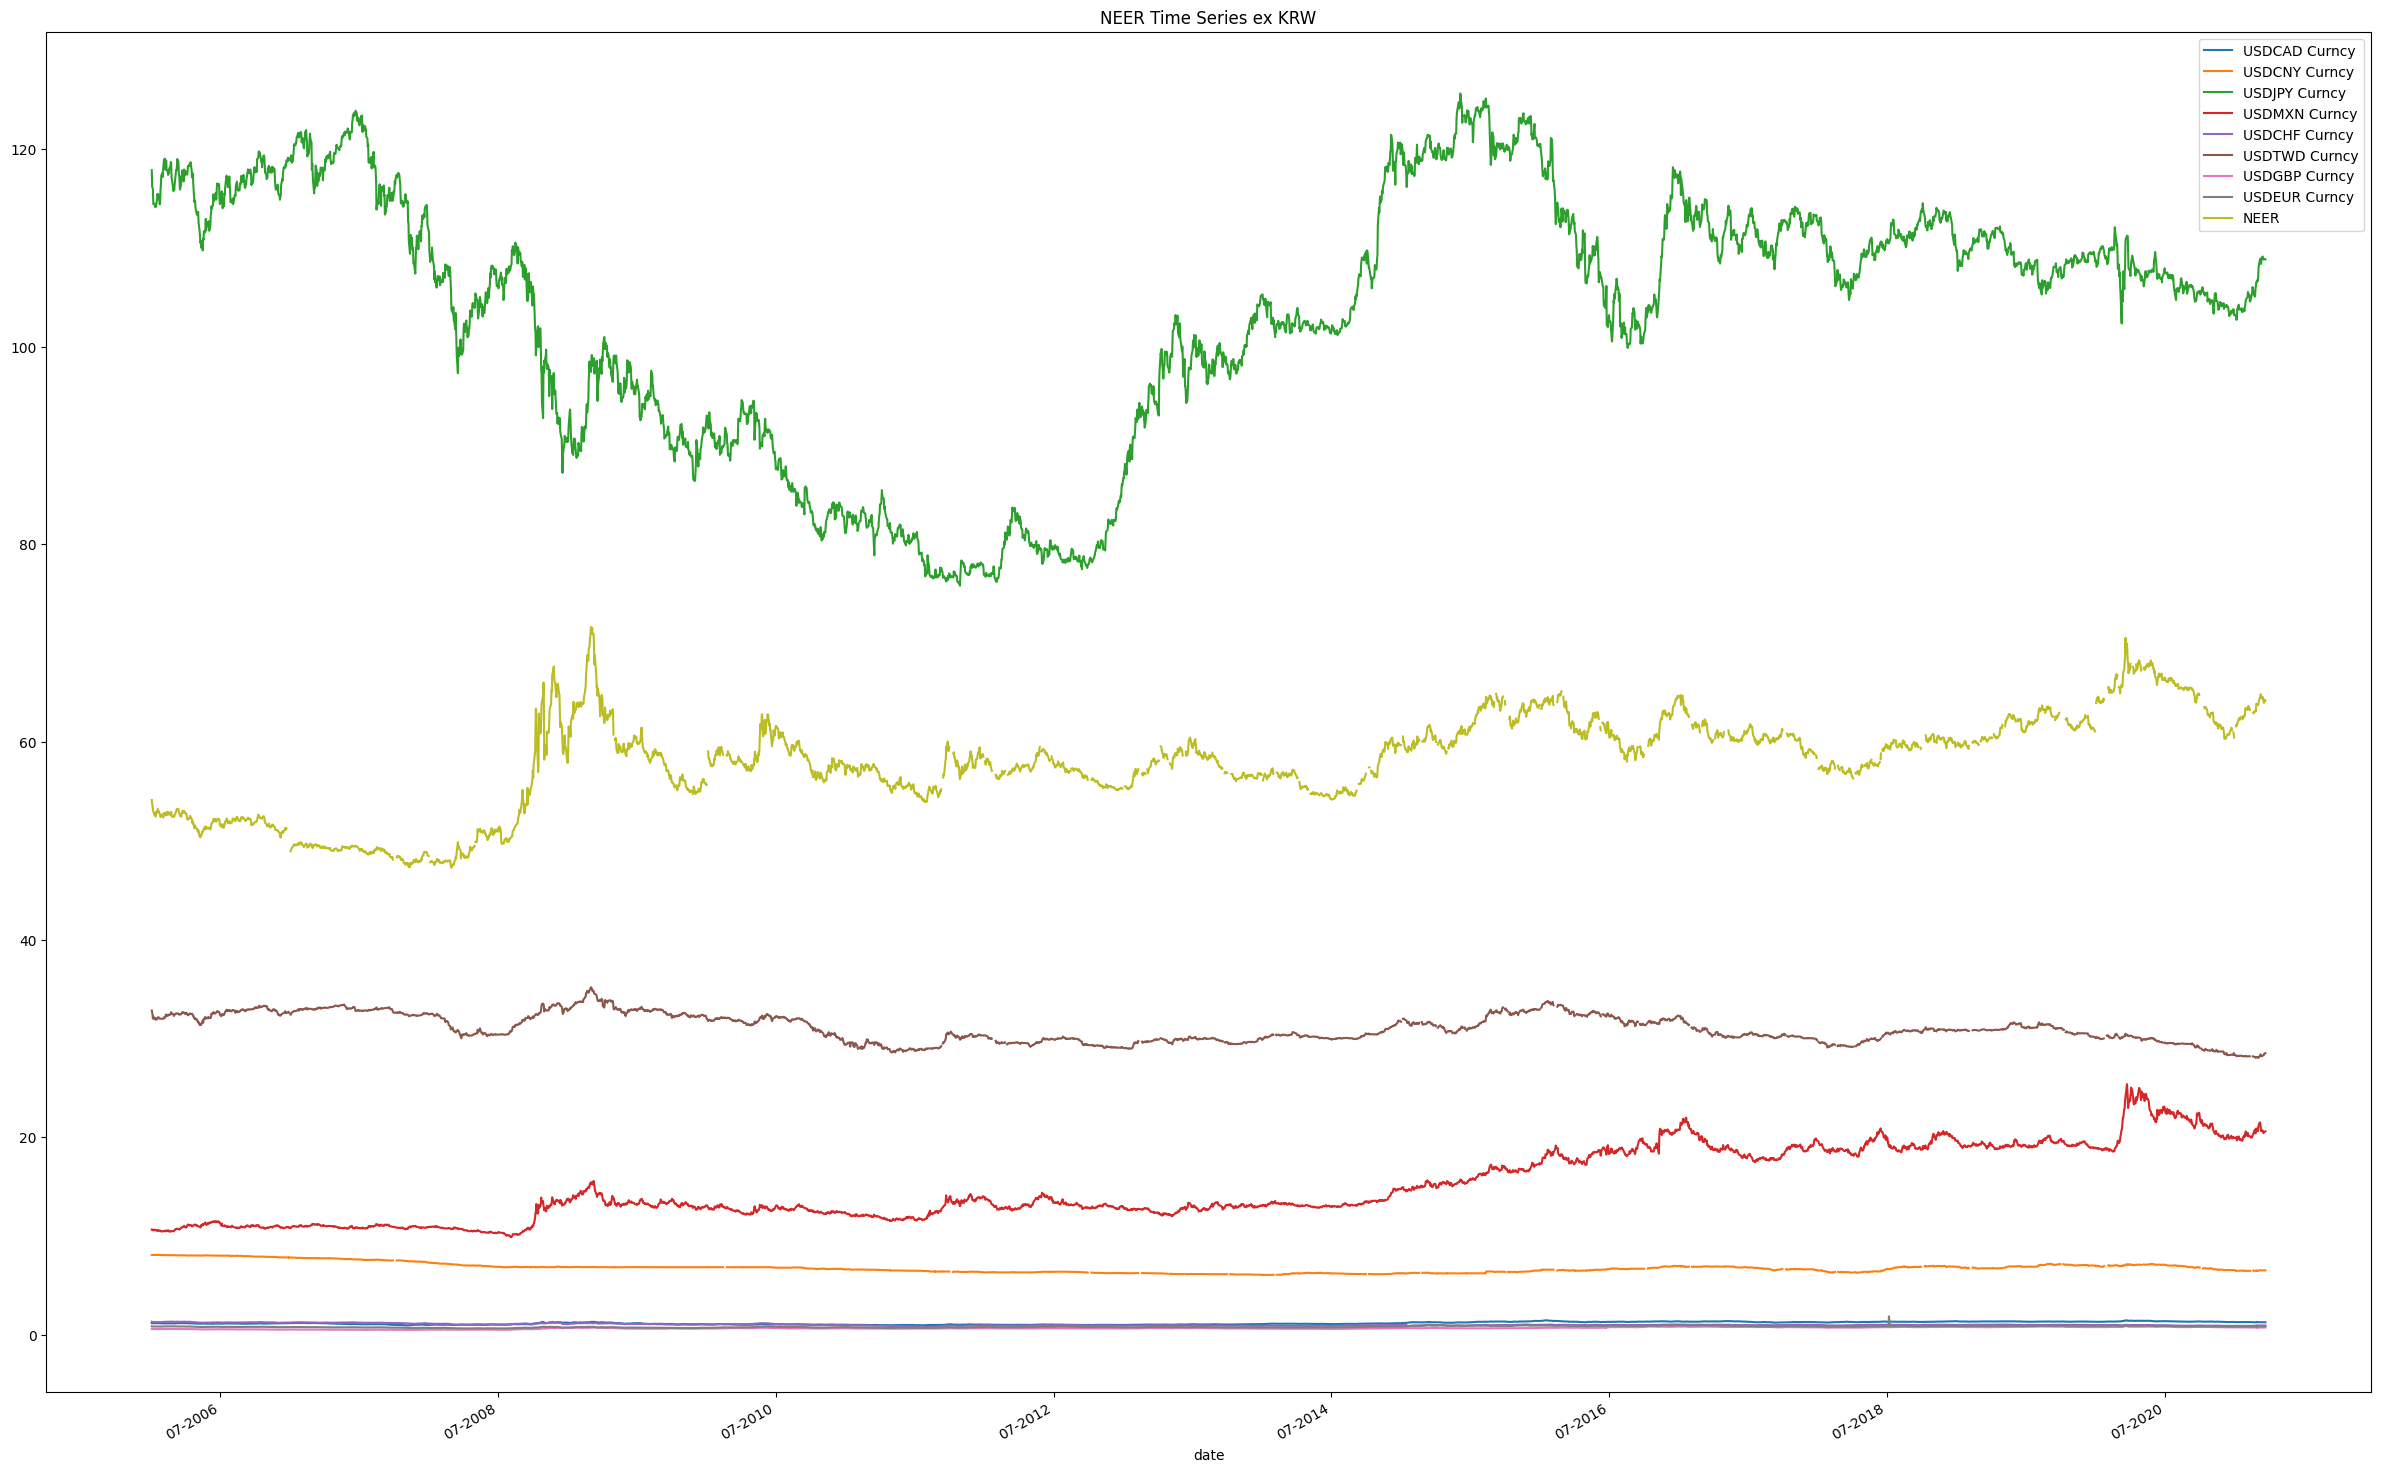

In [60]:
ax = new_currencies.plot(x = 'date', y = ['USDCAD Curncy', 'USDCNY Curncy', 'USDJPY Curncy','USDMXN Curncy','USDCHF Curncy','USDTWD Curncy','USDGBP Curncy','USDEUR Curncy', 'NEER'], label = ['USDCAD Curncy', 'USDCNY Curncy', 'USDJPY Curncy','USDMXN Curncy','USDCHF Curncy','USDTWD Curncy','USDGBP Curncy','USDEUR Curncy', 'NEER'], figsize = (30,20), title = 'NEER Time Series ex KRW')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 24)) # to display ticks every 24 months
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y")) # to set how dates are displayed

# Plot the Given and Calculated NEER

In [61]:
given_NEER = pd.read_excel("file.xlsx", sheet_name = "Task 2", index_col = None)

In [62]:
new_task2 = pd.merge(given_NEER, new_currencies, on='date')

In [63]:
new_task2.head()

date  USD NEER  USDCAD Curncy  USDCNY Curncy  USDJPY Curncy  \
0 2006-01-02  101.4155         1.1635         8.0702         117.88   
1 2006-01-03  100.7558         1.1561         8.0702         116.17   
2 2006-01-04  100.2288         1.1479         8.0676         116.10   
3 2006-01-05  100.2992         1.1621         8.0657         115.93   
4 2006-01-06  100.0241         1.1657         8.0668         114.44   

   USDKRW Curncy  USDMXN Curncy  USDCHF Curncy  USDTWD Curncy  USDGBP Curncy  \
0        1007.95        10.6360         1.3146         32.810         0.5813   
1        1002.85        10.6278         1.2904         32.640         0.5727   
2         998.10        10.5820         1.2768         32.335         0.5687   
3         987.35        10.6323         1.2758         32.008         0.5695   
4         987.90        10.5624         1.2702         32.194         0.5648   

   USDEUR Curncy       NEER  
0         0.8461  54.117948  
1         0.8321  53.731850  
2         0.8252  53.529451  
3         0.8258  53.114619  
4         0.8229  52.968839

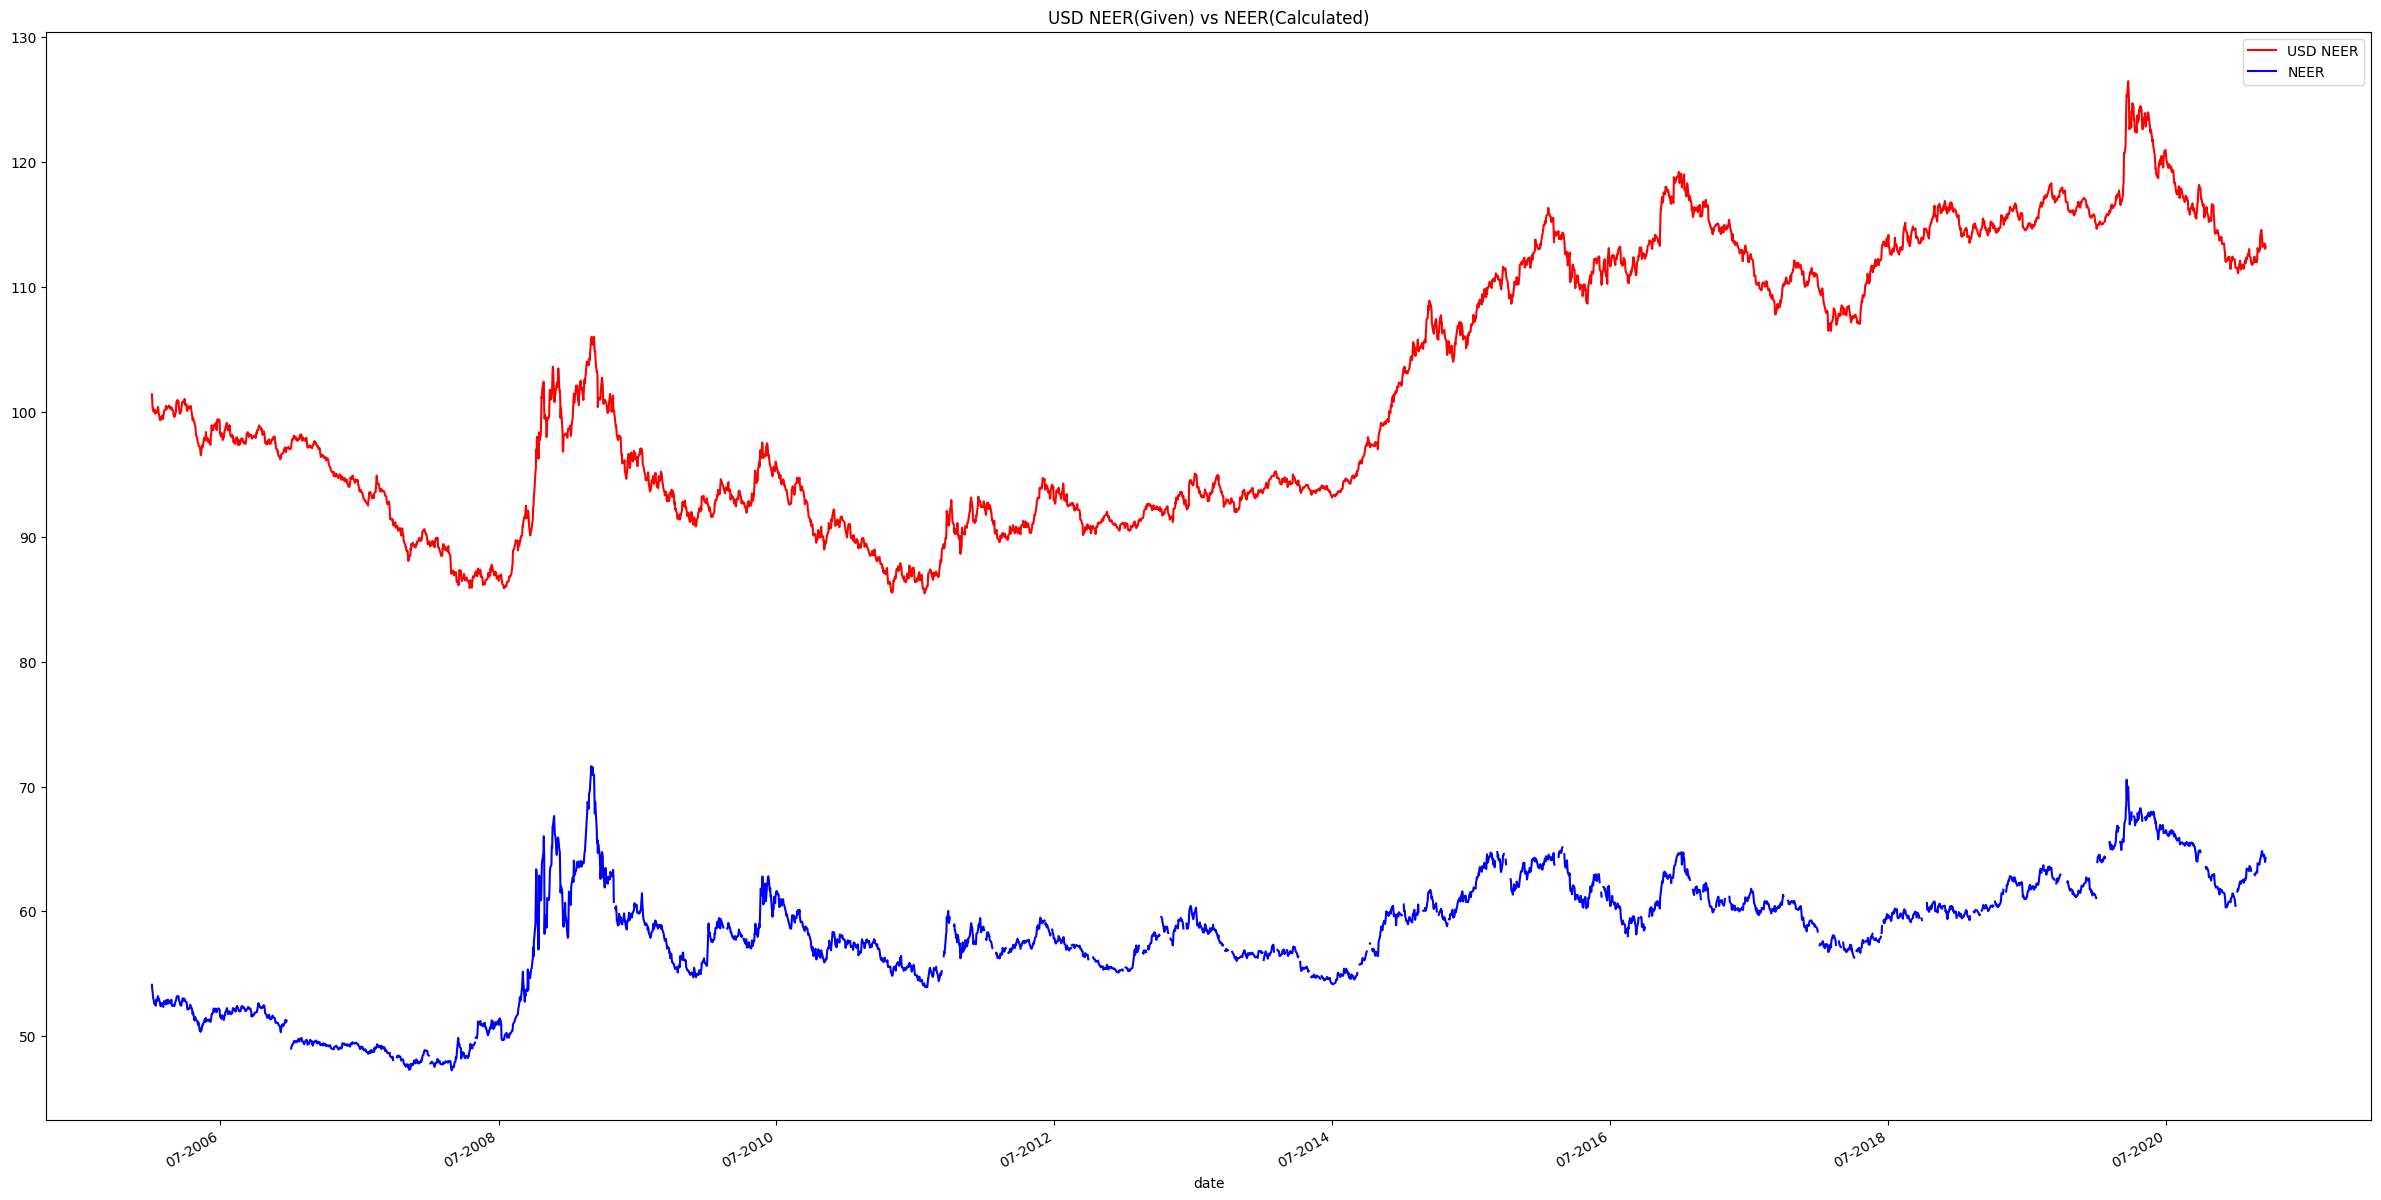

In [64]:
ax = new_task2.plot(x='date', y='USD NEER', color='red', figsize=(30,16), label='USD NEER')
new_task2.plot(x='date', y='NEER', color='blue', label='NEER', ax=ax)
ax.set_title('USD NEER(Given) vs NEER(Calculated)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))


In [65]:
correlation = new_task2['USD NEER'].corr(new_task2['NEER'])
print(f'Correlation between both NEERs is {correlation}')


import numpy as np

# Assuming "predicted" and "actual" are the two series to compare
# Make sure both series have the same length

# Calculate the difference between the two series
diff = new_task2['USD NEER'] - new_task2['NEER']

# Square each difference
squared_diff = np.square(diff)

# Calculate the average of the squared differences
mean_squared_diff = squared_diff.mean()

# Take the square root of the mean squared difference to get RMSE
rmse = np.sqrt(mean_squared_diff)
print(f'rmse is {rmse}')


Correlation between both NEERs is 0.7031549720857035
rmse is 44.072947813738296


Our calculated NEER is lower than the actual NEER because we used a subset of the currencies in the basket, and the normalization weights may not perfectly match those used in the actual NEER calculation. Despite this, both NEERs show a similar trend, as indicated by the high correlation value of 0.703. However, the high RMSE of 44.07 suggests that there is some difference between the two NEERs, which may be due to factors such as the choice of currencies in the basket and the weighting methodology.

In [66]:
#Consolidate the calculation of Composite Indicator
def cal_composite(series):
    rsi_values = RSI(series, 14)
    cci_values = CCI(series, 20)

    composite = pd.Series(index = rsi_values.index)
    for i in range(len(composite)):
        composite[i] = composite_indicator(rsi_values[i], cci_values[i])
    return composite
        

# Calculate the Composite Indicator for each FX pair

In [67]:
#USDCAD 
USDCAD  = new_task2["USDCAD Curncy"]
USDCAD_composite = cal_composite(USDCAD)
new_task2["USDCAD_composite"] = USDCAD_composite

#USDCNY
USDCNY  = new_task2["USDCNY Curncy"]
USDCNY_composite = cal_composite(USDCNY)
new_task2["USDCNY_composite"] = USDCNY_composite


#USDJPY
USDJPY  = new_task2["USDJPY Curncy"]
USDJPY_composite = cal_composite(USDJPY)
new_task2["USDJPY_composite"] = USDJPY_composite


#USDKRW
USDKRW  = new_task2["USDKRW Curncy"]
USDKRW_composite = cal_composite(USDKRW)
new_task2["USDKRW_composite"] = USDKRW_composite


#USDMXN
USDMXN  = new_task2["USDMXN Curncy"]
USDMXN_composite = cal_composite(USDMXN)
new_task2["USDMXN_composite"] = USDMXN_composite



#USDCHF
USDCHF  = new_task2["USDCHF Curncy"]
USDCHF_composite = cal_composite(USDCHF)
new_task2["USDCHF_composite"] = USDCHF_composite


#USDTWD
USDTWD  = new_task2["USDTWD Curncy"]
USDTWD_composite = cal_composite(USDTWD)
new_task2["USDTWD_composite"] = USDTWD_composite


#USDGBP
USDGBP = new_task2["USDGBP Curncy"]
USDGBP_composite = cal_composite(USDGBP)
new_task2["USDGBP_composite"] = USDGBP_composite



#USDEUR
USDEUR = new_task2["USDEUR Curncy"]
USDEUR_composite = cal_composite(USDEUR)
new_task2["USDEUR_composite"] = USDEUR_composite


C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\1505326559.py:6: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  composite = pd.Series(index = rsi_values.index)


In [68]:
new_task2.to_excel("FX_Composite_NEER.xlsx", index=None)
new_task2.head()

date  USD NEER  USDCAD Curncy  USDCNY Curncy  USDJPY Curncy  \
0 2006-01-02  101.4155         1.1635         8.0702         117.88   
1 2006-01-03  100.7558         1.1561         8.0702         116.17   
2 2006-01-04  100.2288         1.1479         8.0676         116.10   
3 2006-01-05  100.2992         1.1621         8.0657         115.93   
4 2006-01-06  100.0241         1.1657         8.0668         114.44   

   USDKRW Curncy  USDMXN Curncy  USDCHF Curncy  USDTWD Curncy  USDGBP Curncy  \
0        1007.95        10.6360         1.3146         32.810         0.5813   
1        1002.85        10.6278         1.2904         32.640         0.5727   
2         998.10        10.5820         1.2768         32.335         0.5687   
3         987.35        10.6323         1.2758         32.008         0.5695   
4         987.90        10.5624         1.2702         32.194         0.5648   

   ...       NEER  USDCAD_composite  USDCNY_composite  USDJPY_composite  \
0  ...  54.117948               0.0               0.0               0.0   
1  ...  53.731850               0.0               0.0               0.0   
2  ...  53.529451               0.0               0.0               0.0   
3  ...  53.114619               0.0               0.0               0.0   
4  ...  52.968839               0.0               0.0               0.0   

   USDKRW_composite  USDMXN_composite  USDCHF_composite  USDTWD_composite  \
0               0.0               0.0               0.0               0.0   
1               0.0               0.0               0.0               0.0   
2               0.0               0.0               0.0               0.0   
3               0.0               0.0               0.0               0.0   
4               0.0               0.0               0.0               0.0   

   USDGBP_composite  USDEUR_composite  
0               0.0               0.0  
1               0.0               0.0  
2               0.0               0.0  
3               0.0               0.0  
4               0.0               0.0  

[5 rows x 21 columns]

Plotting the graph of all occurences when more than half the currencies have a Composite Indication = 2

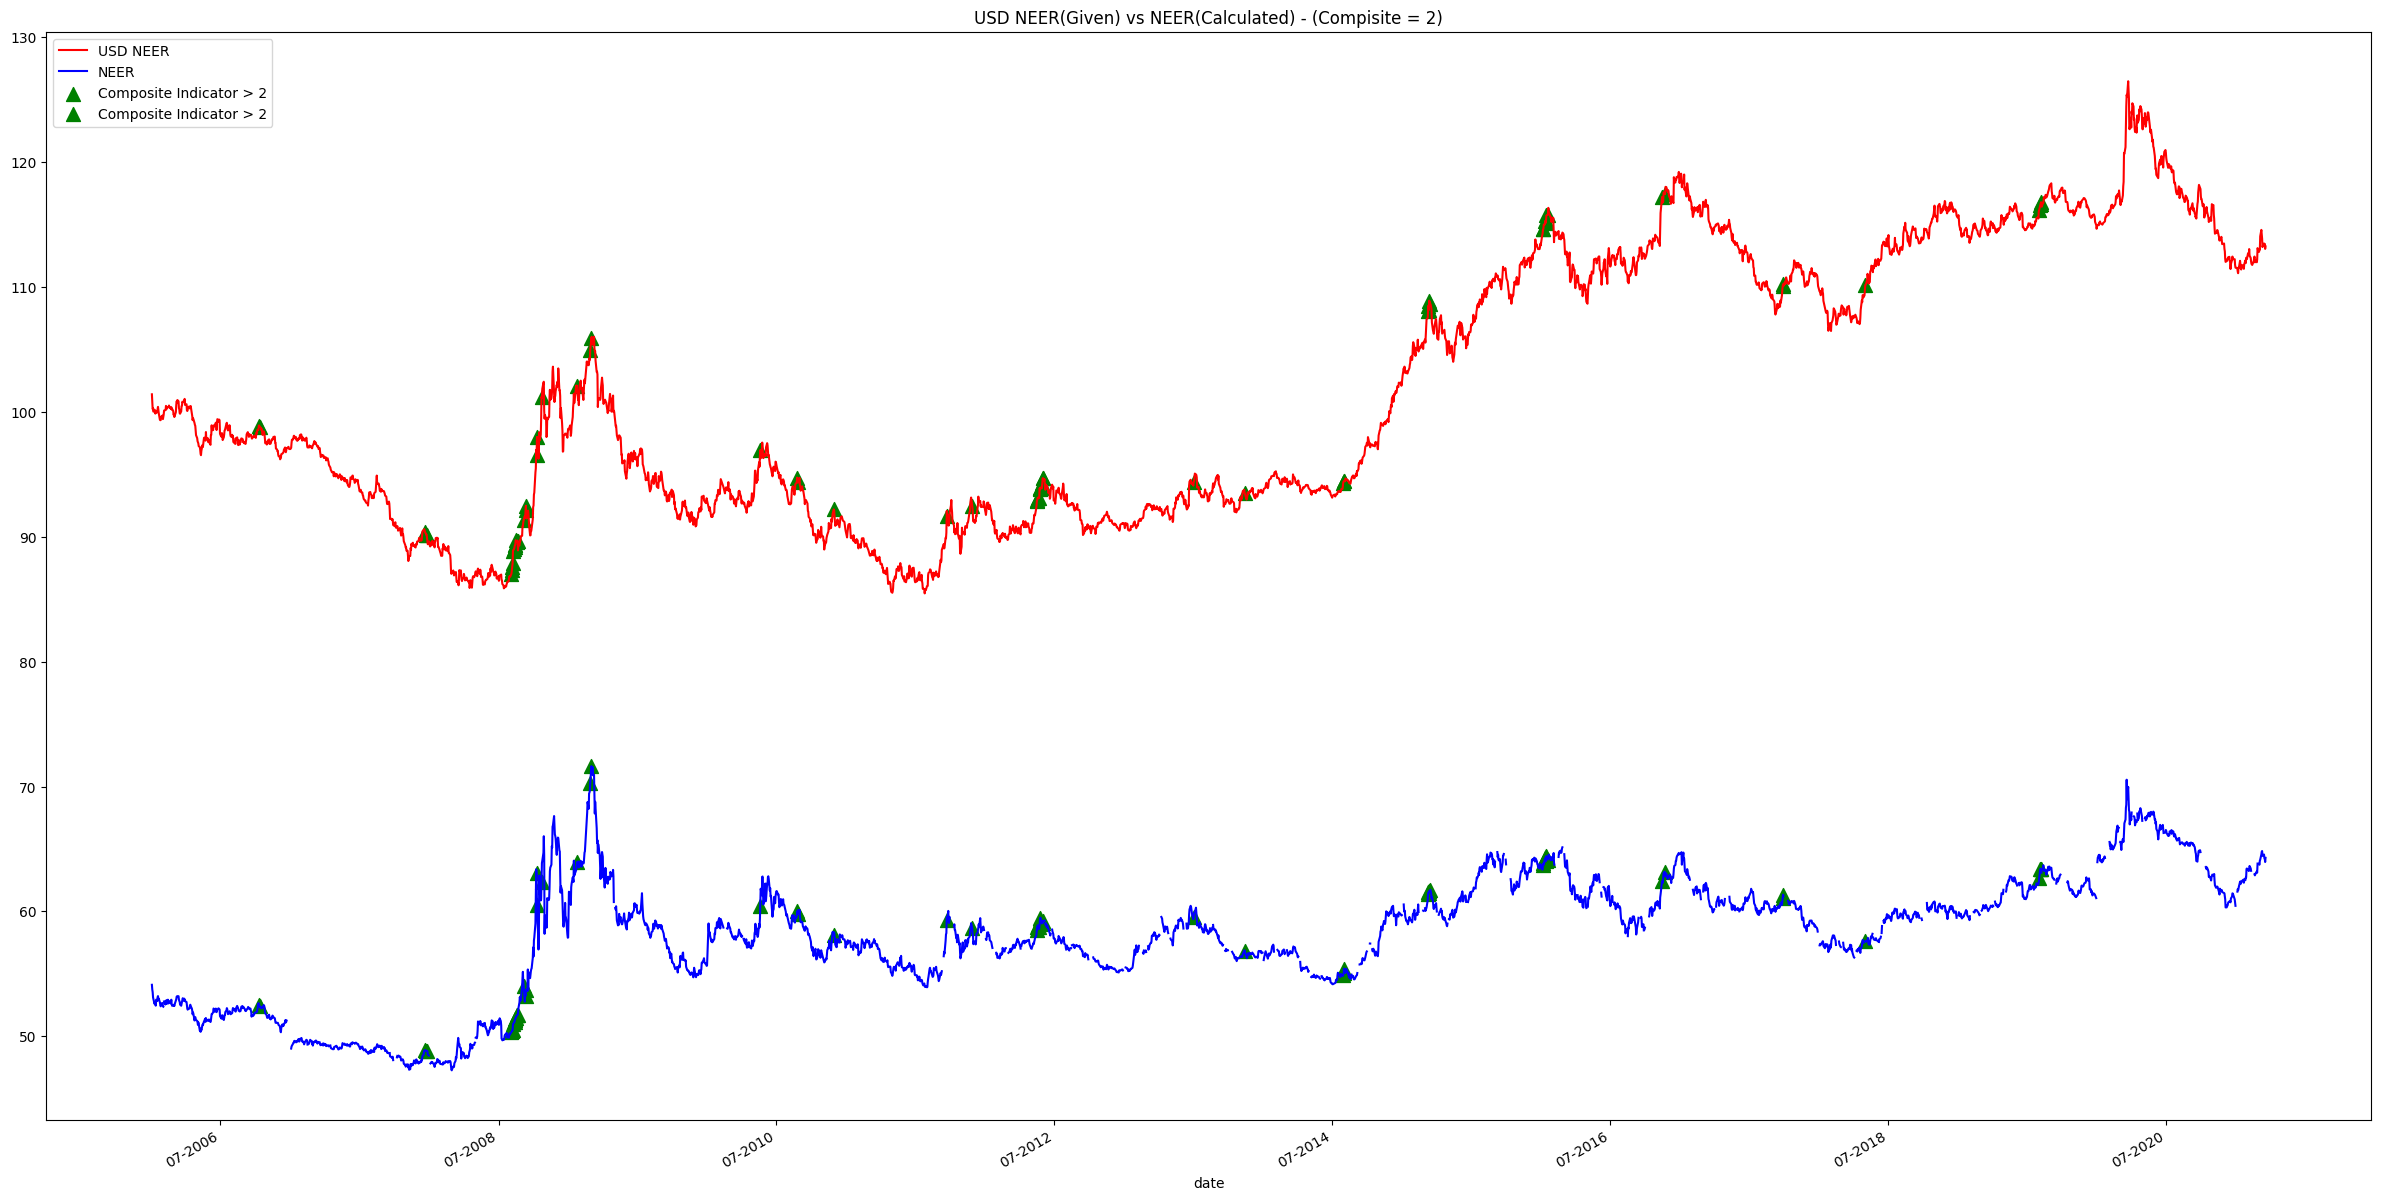

In [69]:
import matplotlib.pyplot as plt

# Create boolean mask
mask = (new_task2.iloc[:, 12:] == 2).sum(axis=1) > (new_task2.iloc[:, 12:].notna().sum(axis=1) / 2)

# Plot the graph and markers on the same plot
fig, ax = plt.subplots(figsize=(30,16))
new_task2.plot(x='date', y='USD NEER', color='red', label='USD NEER', ax=ax)
new_task2.plot(x='date', y='NEER', color='blue', label='NEER', ax=ax)
ax.scatter(new_task2.loc[mask, 'date'], new_task2.loc[mask, 'USD NEER'], marker='^', color='green', label='Composite Indicator > 2', s = 100)
ax.scatter(new_task2.loc[mask, 'date'], new_task2.loc[mask, 'NEER'], marker='^', color='green', label='Composite Indicator > 2', s = 100)
ax.set_title('USD NEER(Given) vs NEER(Calculated) - (Compisite = 2)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
ax.legend()

plt.show()


The occurences when more than half the currencies have a Composite Indication = 2 in both charts are at similar trends

# Calculate the rolling 250-day percentile rank for each EX pair

In [70]:
#USDCAD
USDCAD  = new_task2["USDCAD Curncy"]
USDCAD_rank = rolling_percentile_rank(USDCAD, 250)
new_task2["USDCAD_rank"] = USDCAD_rank

#USDCNY
USDCNY  = new_task2["USDCNY Curncy"]
USDCNY_rank = rolling_percentile_rank(USDCNY, 250)
new_task2["USDCNY_rank"] = USDCNY_rank

#USDJPY
USDJPY  = new_task2["USDJPY Curncy"]
USDJPY_rank = rolling_percentile_rank(USDJPY, 250)
new_task2["USDJPY_rank"] = USDJPY_rank

#USDKRW
USDKRW  = new_task2["USDKRW Curncy"]
USDKRW_rank = rolling_percentile_rank(USDKRW, 250)
new_task2["USDKRW_rank"] = USDKRW_rank

#USDMXN
USDMXN  = new_task2["USDMXN Curncy"]
USDMXN_rank = rolling_percentile_rank(USDMXN, 250)
new_task2["USDMXN_rank"] = USDMXN_rank

#USDCHF
USDCHF  = new_task2["USDCHF Curncy"]
USDCHF_rank = rolling_percentile_rank(USDCHF, 250)
new_task2["USDCHF_rank"] = USDCHF_rank

#USDTWD
USDTWD  = new_task2["USDTWD Curncy"]
USDTWD_rank = rolling_percentile_rank(USDTWD, 250)
new_task2["USDTWD_rank"] = USDTWD_rank

#USDGBP
USDGBP  = new_task2["USDGBP Curncy"]
USDGBP_rank = rolling_percentile_rank(USDGBP, 250)
new_task2["USDGBP_rank"] = USDGBP_rank

#USDEUR
USDEUR  = new_task2["USDEUR Curncy"]
USDEUR_rank = rolling_percentile_rank(USDEUR, 250)
new_task2["USDEUR_rank"] = USDEUR_rank

In [71]:
new_task2.to_excel("FX_Composite_Rank_NEER.xlsx", index=None)

In [72]:
new_task2.head()

date  USD NEER  USDCAD Curncy  USDCNY Curncy  USDJPY Curncy  \
0 2006-01-02  101.4155         1.1635         8.0702         117.88   
1 2006-01-03  100.7558         1.1561         8.0702         116.17   
2 2006-01-04  100.2288         1.1479         8.0676         116.10   
3 2006-01-05  100.2992         1.1621         8.0657         115.93   
4 2006-01-06  100.0241         1.1657         8.0668         114.44   

   USDKRW Curncy  USDMXN Curncy  USDCHF Curncy  USDTWD Curncy  USDGBP Curncy  \
0        1007.95        10.6360         1.3146         32.810         0.5813   
1        1002.85        10.6278         1.2904         32.640         0.5727   
2         998.10        10.5820         1.2768         32.335         0.5687   
3         987.35        10.6323         1.2758         32.008         0.5695   
4         987.90        10.5624         1.2702         32.194         0.5648   

   ...  USDEUR_composite  USDCAD_rank  USDCNY_rank  USDJPY_rank  USDKRW_rank  \
0  ...               0.0          NaN          NaN          NaN          NaN   
1  ...               0.0          NaN          NaN          NaN          NaN   
2  ...               0.0          NaN          NaN          NaN          NaN   
3  ...               0.0          NaN          NaN          NaN          NaN   
4  ...               0.0          NaN          NaN          NaN          NaN   

   USDMXN_rank  USDCHF_rank  USDTWD_rank  USDGBP_rank  USDEUR_rank  
0          NaN          NaN          NaN          NaN          NaN  
1          NaN          NaN          NaN          NaN          NaN  
2          NaN          NaN          NaN          NaN          NaN  
3          NaN          NaN          NaN          NaN          NaN  
4          NaN          NaN          NaN          NaN          NaN  

[5 rows x 30 columns]

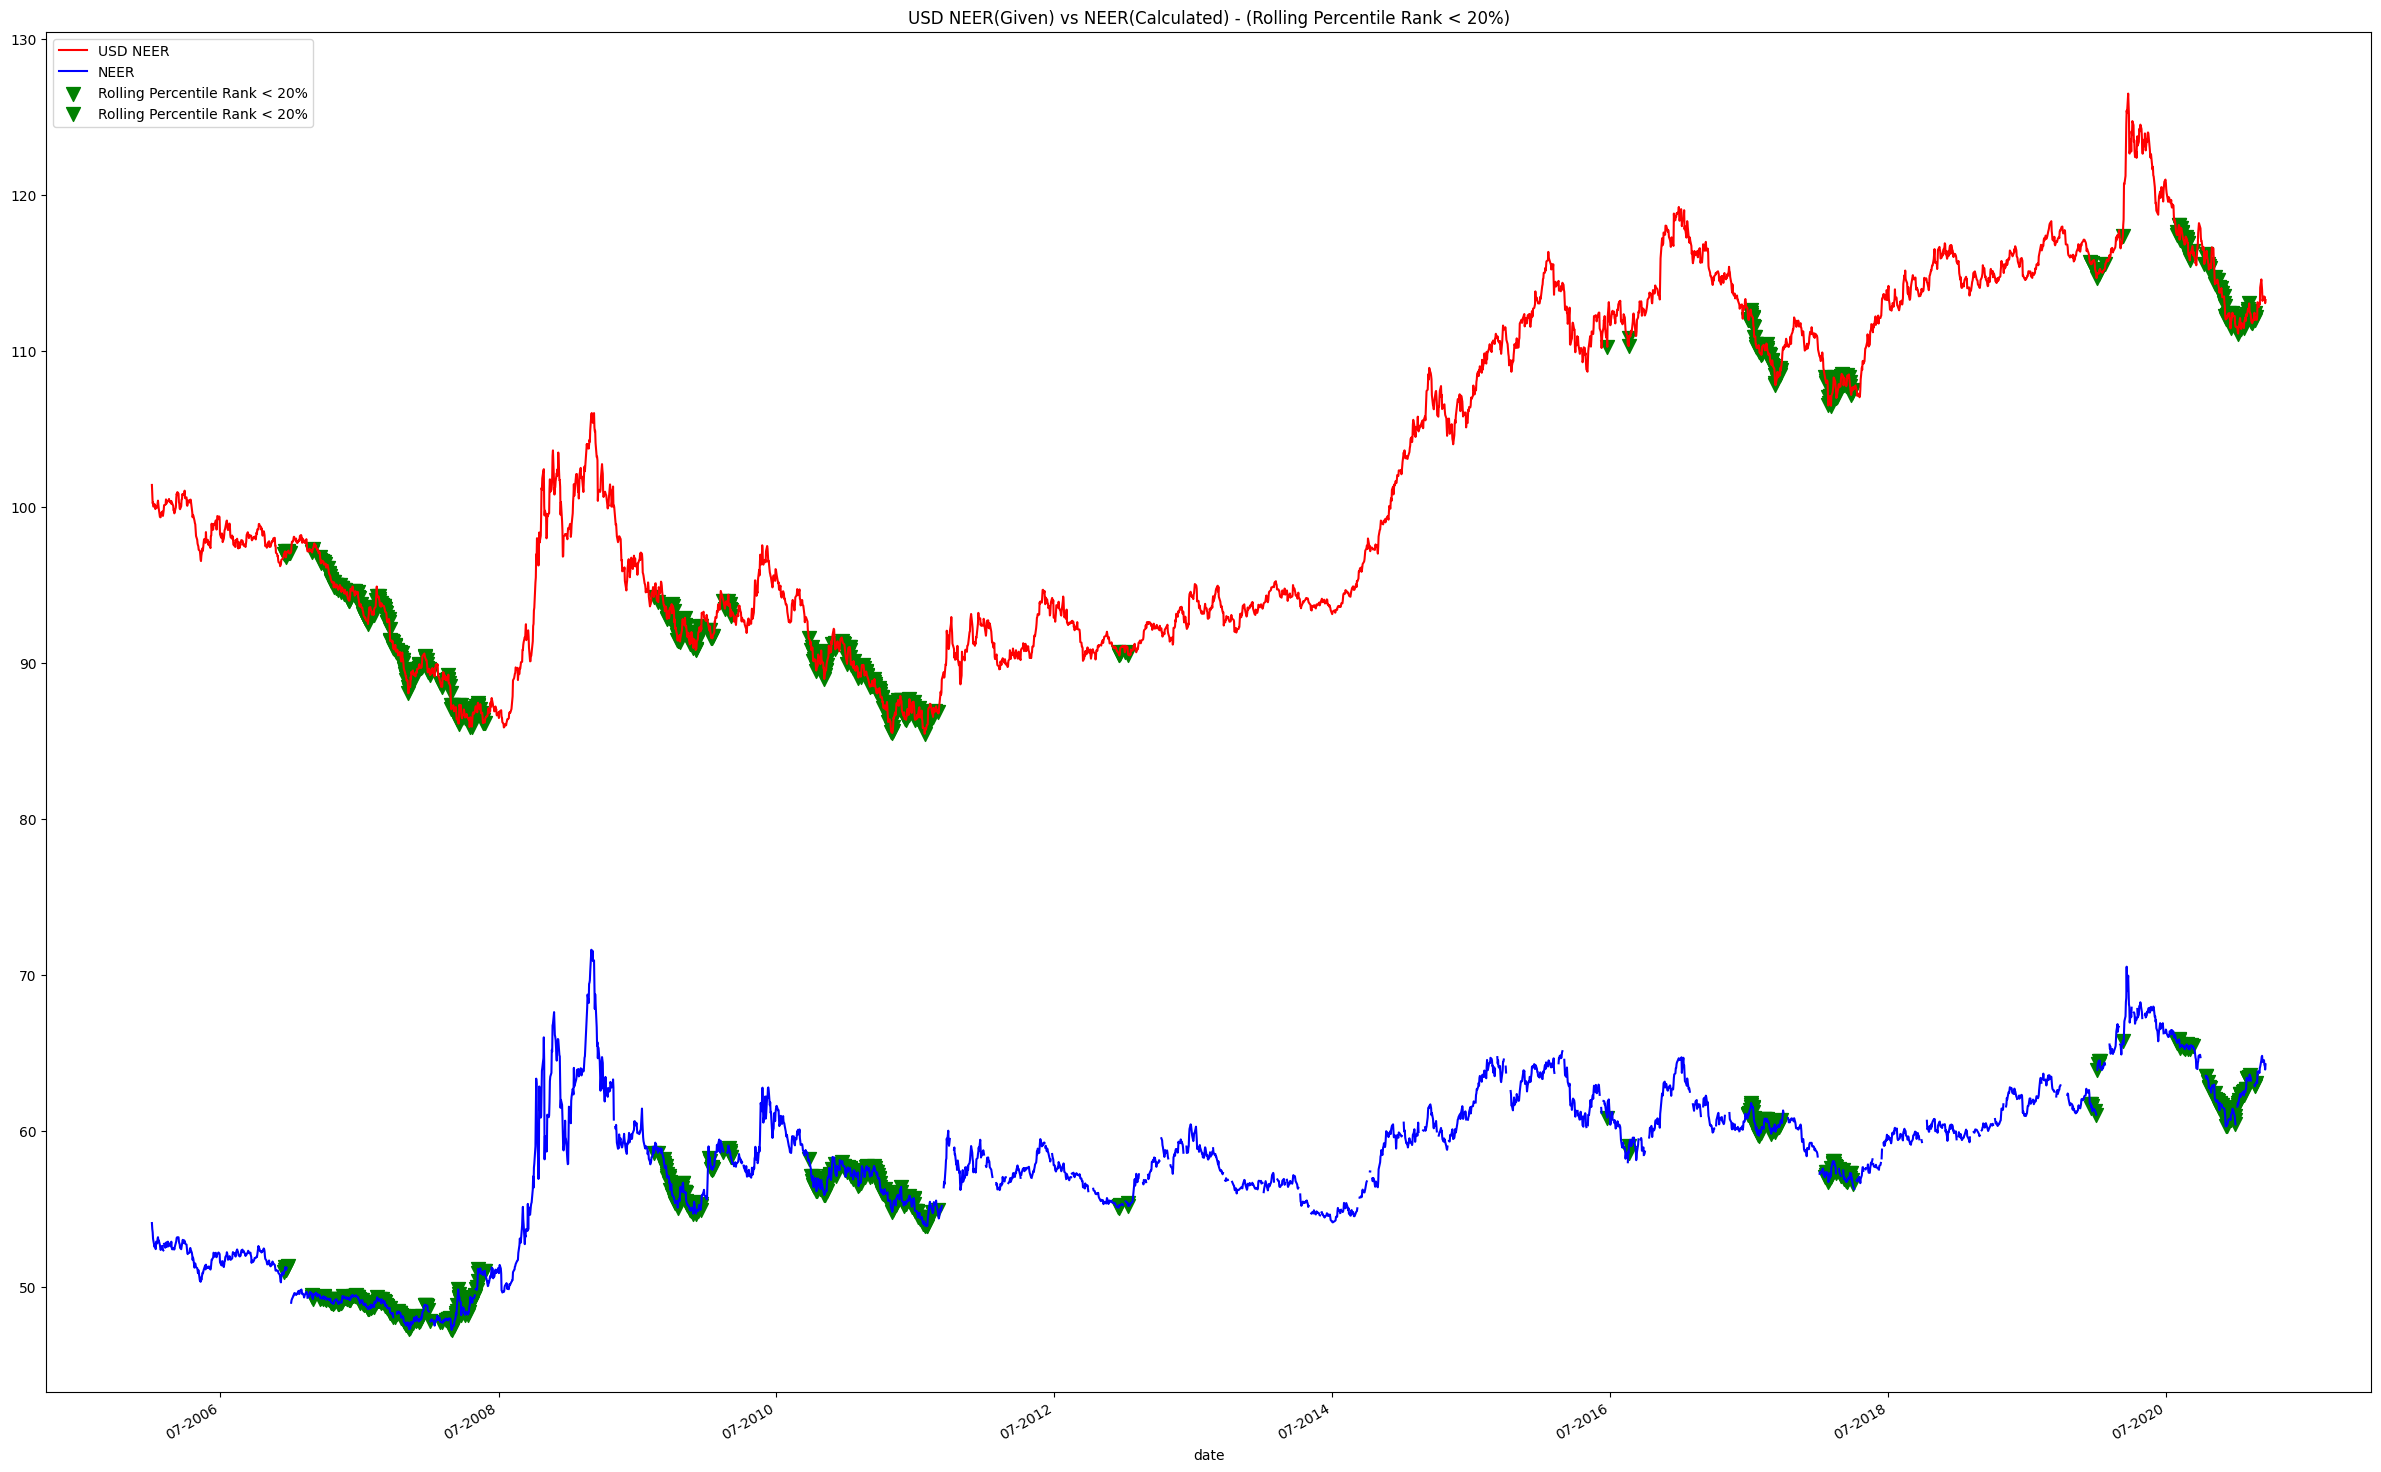

In [73]:
# Create boolean mask
mask = (new_task2.iloc[:, 21:] <0.2).sum(axis=1) > (new_task2.iloc[:, 21:].notna().sum(axis=1) / 2)

# Plot the graph and markers on the same plot
fig, ax = plt.subplots(figsize=(30,20))
new_task2.plot(x='date', y='USD NEER', color='red', label='USD NEER', ax=ax)
new_task2.plot(x='date', y='NEER', color='blue', label='NEER', ax=ax)
ax.scatter(new_task2.loc[mask, 'date'], new_task2.loc[mask, 'USD NEER'], marker='v', color='green', label='Rolling Percentile Rank < 20%', s = 100)
ax.scatter(new_task2.loc[mask, 'date'], new_task2.loc[mask, 'NEER'], marker='v', color='green', label='Rolling Percentile Rank < 20%', s = 100)
ax.set_title('USD NEER(Given) vs NEER(Calculated) - (Rolling Percentile Rank < 20%)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
ax.legend()

plt.show()

The occurences when more than half the currencies have rolling 250-day percentile rank below 20% in both charts are at similar trends

# Plotting both conditions on the same plot

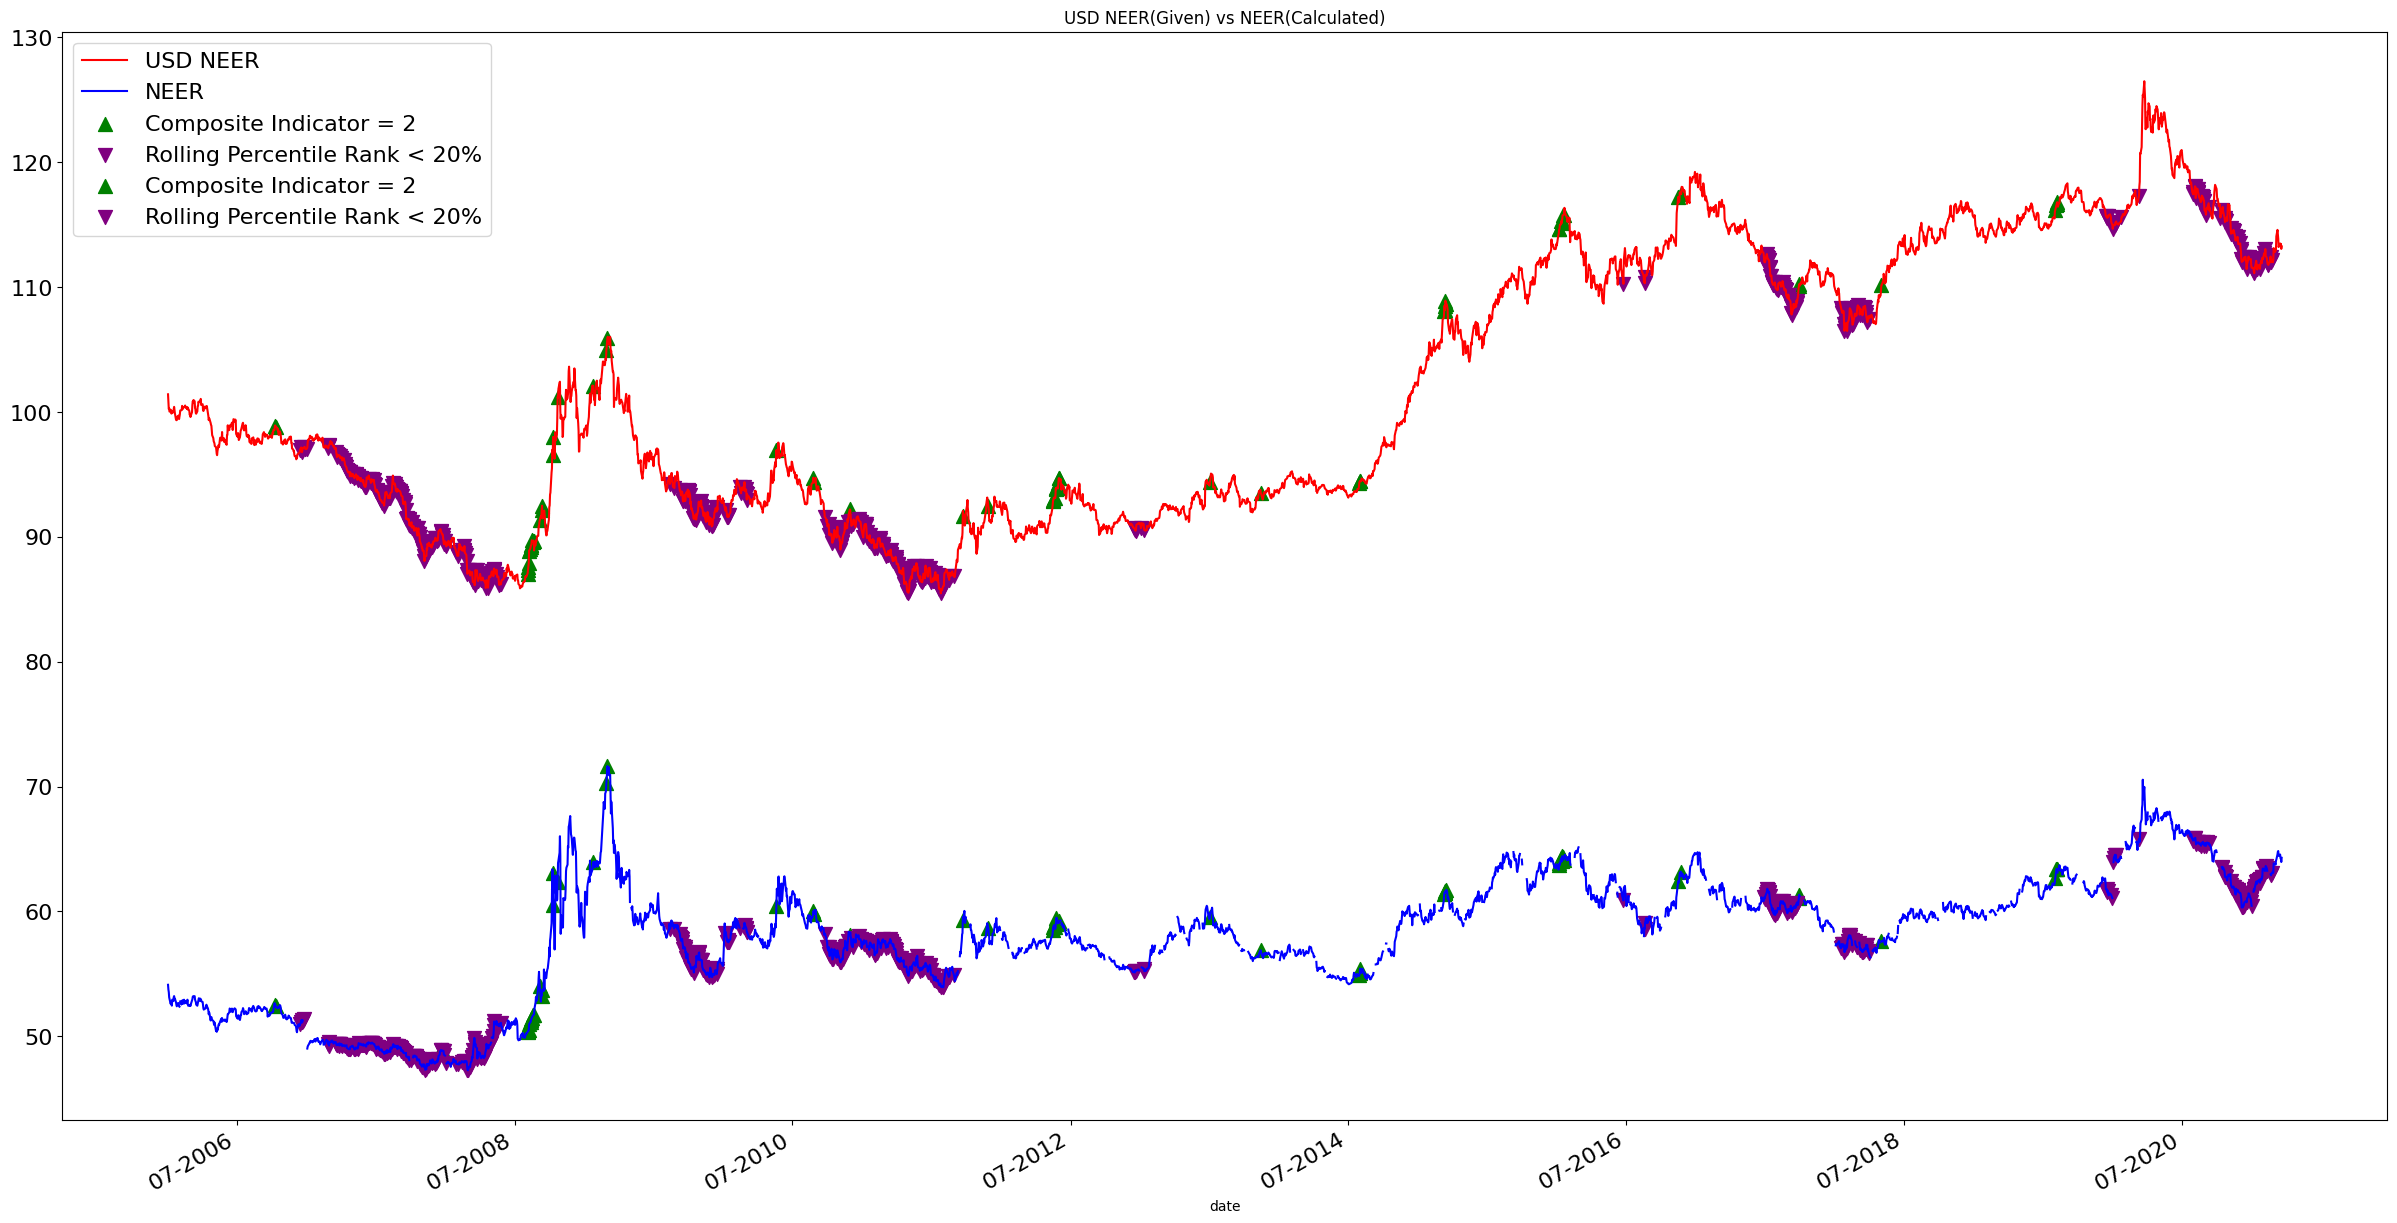

In [74]:
# Create composite mask
composite_mask  = (new_task2.iloc[:, 12:21] == 2).sum(axis=1) > (new_task2.iloc[:, 12:21].notna().sum(axis=1) / 2)
# Create rank mask
rank_mask  = (new_task2.iloc[:, 21:] <0.2).sum(axis=1) > (new_task2.iloc[:, 21:].notna().sum(axis=1) / 2)

# Plot the graph and markers on the same plot
fig, ax = plt.subplots(figsize=(30,16))
new_task2.plot(x='date', y='USD NEER', color='red', label='USD NEER', ax=ax)
new_task2.plot(x='date', y='NEER', color='blue', label='NEER', ax=ax)
ax.scatter(new_task2.loc[composite_mask, 'date'], new_task2.loc[composite_mask, 'USD NEER'], marker='^', color='green', label='Composite Indicator = 2', s=100)
ax.scatter(new_task2.loc[rank_mask, 'date'], new_task2.loc[rank_mask, 'USD NEER'], marker='v', color='purple', label='Rolling Percentile Rank < 20%', s=100)
ax.scatter(new_task2.loc[composite_mask, 'date'], new_task2.loc[composite_mask, 'NEER'], marker='^', color='green', label='Composite Indicator = 2', s=100)
ax.scatter(new_task2.loc[rank_mask, 'date'], new_task2.loc[rank_mask, 'NEER'], marker='v', color='purple', label='Rolling Percentile Rank < 20%', s=100)
ax.set_title('USD NEER(Given) vs NEER(Calculated)')
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter("%m-%Y"))
ax.legend(fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=16)

plt.show()

The rolling percentile rank of more than half of the currencies below 20% suggests that the majority of the currencies have experienced a significant decline in value compared to their recent history, indicating a possible bearish trend in the foreign exchange market. This is demonstrated in the plot where most of the rolling percentile rank values below 20% occur during a downtrend.

Furthermore, a Composite Indicator value of 2 indicates an overbought area. As shown in the plot, most of the green triangles indicating Composite Indicator > 2 occur at the all-time highs of the NEER, just before it declines.

However, it's worth noting that the rolling n-day percentile rank is based on a large window of 250 days, which may result in missing values in some FX pairs. Handling missing values in high-frequency data like FX pairs is challenging, and any method for dealing with missing values may introduce noise or bias into the data. Therefore, it's important to be cautious while dealing with missing values, and methods like interpolation or filling may not be suitable in all cases.

Additionally, the fact that the two conditions occur at similar points where the trends for both NEER are similar suggests that the calculated NEER is closely related to the given NEER.

# Plot a Scatterplot of USD NEER Against USD CNY

In [75]:
#Get a year column
new_task2['Year'] = pd.to_datetime(new_task2['date']).dt.year

corr value: 0.04502373806441827 vs r_value: 0.045023738064418284
R-squared: 0.002027136989293348


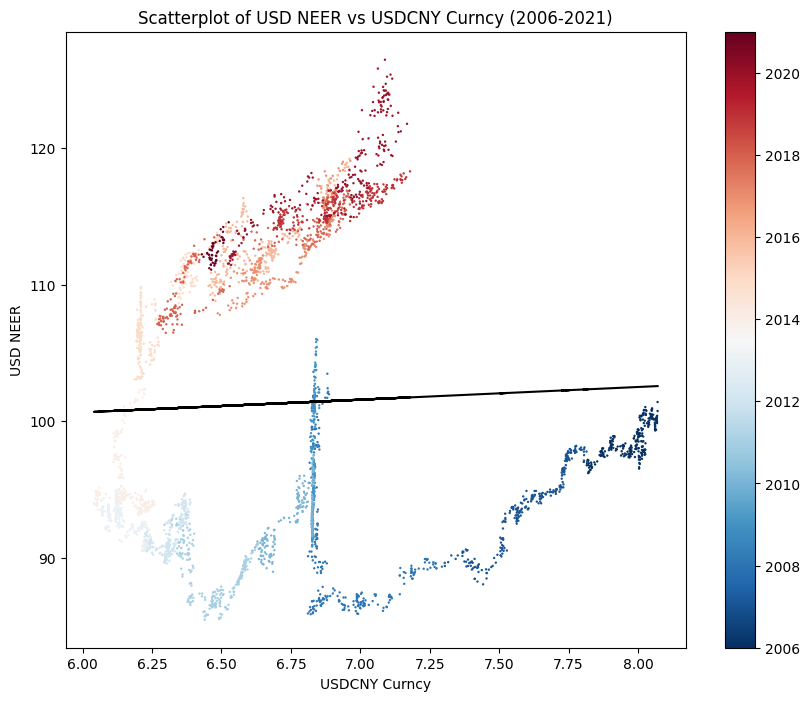

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm

import scipy.stats
#I will remove the NaN values only for the calculation of the slope
mask = ~np.isnan(new_task2['USDCNY Curncy']) & ~np.isnan(new_task2['USD NEER'])
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(new_task2['USDCNY Curncy'][mask], new_task2['USD NEER'][mask])


#Correlation value with NaN values included
corr_value = new_task2["USDCNY Curncy"].corr(new_task2["USD NEER"])
print(f'corr value: {corr_value} vs r_value: {r_value}')

r_squared = r_value ** 2
print("R-squared:", r_squared)

# Create a colormap that goes from blue (2006) to red (2021)
cmap = cm.get_cmap('RdBu_r')
norm = colors.Normalize(vmin=2006, vmax=2021)

# Plot the scatterplot with colored points
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(new_task2['USDCNY Curncy'], new_task2['USD NEER'], c=new_task2['Year'], cmap=cmap, norm=norm, s = 0.5)
plt.colorbar()

# Set axis labels and title
plt.xlabel('USDCNY Curncy')
plt.ylabel('USD NEER')
plt.title('Scatterplot of USD NEER vs USDCNY Curncy (2006-2021)')
ax.plot(new_task2['USDCNY Curncy'], slope * new_task2['USDCNY Curncy'] + intercept, color='black')

# Show the plot
plt.show()



Initial visual inspection has shown a weak positive correlation between USDCNY and USD NEER. This is further supported by the corr_value(All values intact) = 0.045, r_value(ex NaN values) = 0.045 and low R-squared = 0.00202.

Hence, a increase in USDCNY might not be associated with an increase in USD NEER as there is little to no linear relationship between the two variables.
The low r-squared also suggests that only a low proportion of variance in USD NEER is explained by USDCNY

Additionally, the USD NEER/USDCNY value decreased until 2014 and has been fluctuating between 6.5 and 7 since around 2018.


# Using Time Series Regression to further inspect the relationship 

In [77]:
import statsmodels.api as sm
temp = new_task2.copy()
#Remove NA from USDCNY to conduct regression
temp = temp.dropna(subset=['USDCNY Curncy'])
y = temp['USD NEER']
x1 = temp['USDCNY Curncy']
x2 = temp["Year"]


x = sm.add_constant(pd.DataFrame({'USDCNY': x1, 'Year': x2}))
#Double check to remove Null values before running the regression
x = x.dropna()

# Fit the time-series regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               USD NEER   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                 1.026e+04
Date:                Thu, 09 Mar 2023   Prob (F-statistic):               0.00
Time:                        11:40:50   Log-Likelihood:                -10297.
No. Observations:                3650   AIC:                         2.060e+04
Df Residuals:                    3647   BIC:                         2.062e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -4932.6656     35.160   -140.292      0.0

# Using normal linear regression

In [78]:
y = temp['USD NEER']
x = temp['USDCNY Curncy']

# Add a constant to the independent variable
x = sm.add_constant(x)

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:               USD NEER   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     7.410
Date:                Thu, 09 Mar 2023   Prob (F-statistic):            0.00652
Time:                        11:40:50   Log-Likelihood:                -13744.
No. Observations:                3650   AIC:                         2.749e+04
Df Residuals:                    3648   BIC:                         2.750e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            95.0861      2.316     41.064

The low p-values (<0.05) in both linear regression models suggest that USDCNY is statistically significant and we can reject the null hypothesis that there is no relationship between USDCNY and USD NEER. This means that USDCNY has a significant effect on USD NEER, with a one unit increase in USDCNY associated with an increase of either 0.9290 (without considering time) or 0.150 (considering time) in USD NEER.

However, the low correlation value indicates that changes in USDCNY are not necessarily associated with predictable changes in USD NEER. This suggests that a linear regression model may not be the best approach for analyzing the relationship between USDCNY and USD NEER, as supported by visual inspection of the data.

# NFP and Initial Claims

# Data Pre-processing

In [79]:
task_3 = pd.read_excel("file.xlsx", sheet_name = "Task 3", index_col = None)

In [80]:
task_3.head()

date  nonfarm_payroll     date.1  initial_claims
0 2001-01-31            -10.0 2001-01-05             337
1 2001-02-28             92.0 2001-01-12             318
2 2001-03-31            -43.0 2001-01-19             343
3 2001-04-30           -286.0 2001-01-26             362
4 2001-05-31            -49.0 2001-02-02             376

In [81]:
#Split the dataframe into their respective dataframes
nfp = task_3[['date', 'nonfarm_payroll']]
nfp = nfp.dropna() #Drop the NaN values that arises due to having more claims entries than nfp

claims = task_3[['date.1', 'initial_claims']]
print(claims.head())
print(nfp.head())

      date.1  initial_claims
0 2001-01-05             337
1 2001-01-12             318
2 2001-01-19             343
3 2001-01-26             362
4 2001-02-02             376
        date  nonfarm_payroll
0 2001-01-31            -10.0
1 2001-02-28             92.0
2 2001-03-31            -43.0
3 2001-04-30           -286.0
4 2001-05-31            -49.0


In [82]:
nfp.to_excel("nfp.xlsx", index=None)
claims.to_excel("claims.xlsx", index= None)

# Find NFP release dates

In [83]:
nfp_start = nfp["date"].iloc[0]
nfp_end = nfp["date"].iloc[-1]

In [84]:
date_list = nfp['date']

In [85]:
import datetime

#Function to get first friday of the next month

def first_friday_of_next_month(dates):
    first_fridays = []
    for date in dates:
        next_month = datetime.date(date.year + (date.month // 12), (date.month % 12) + 1, 1)
        if next_month.weekday() == 4 and next_month.day <= 7: # First day of the month is a Friday
            next_month += datetime.timedelta(days=7)
        while next_month.weekday() != 4:
            next_month += datetime.timedelta(days=1)
        first_fridays.append(next_month)
    return first_fridays



In [86]:
nfp_release_date = first_friday_of_next_month(date_list)
nfp["nfp_release_date"] = nfp_release_date


In [87]:
nfp.to_excel("nfp_date.xlsx", index=None)
print(nfp.head())

        date  nonfarm_payroll nfp_release_date
0 2001-01-31            -10.0       2001-02-02
1 2001-02-28             92.0       2001-03-02
2 2001-03-31            -43.0       2001-04-06
3 2001-04-30           -286.0       2001-05-04
4 2001-05-31            -49.0       2001-06-08


# Find Claims release date

In [88]:

claims_date_list = claims['date.1']

In [89]:
import datetime

def thursday_of_following_week(dates):
    next_thursdays = []
    for date in dates:
        next_thursday = date + datetime.timedelta(days=(10 - date.weekday()) % 7)
        next_thursdays.append(next_thursday)
    return next_thursdays


In [90]:
claims_release_date = thursday_of_following_week(claims_date_list)

In [91]:
claims["claims_release_date"] = claims_release_date

C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\3219970540.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  claims["claims_release_date"] = claims_release_date


In [92]:
claims.to_excel("claims_date.xlsx", index = None)
print(claims.head())

      date.1  initial_claims claims_release_date
0 2001-01-05             337          2001-01-11
1 2001-01-12             318          2001-01-18
2 2001-01-19             343          2001-01-25
3 2001-01-26             362          2001-02-01
4 2001-02-02             376          2001-02-08


Initial claims data is often used as a leading indicator of the labor market, as it provides an early indication of changes in employment levels.  

In my follwing steps, I wil assume that initial claims will affect the NFP of the following month (Initial Claims in Jan affects NFP results in Feb) since NFP results come out on the first Friday.  

This assumption is based on the fact that changes in employment levels are not immediately reflected in the NFP report, and there is typically a lag of a few weeks before the changes are fully captured in the report.

In [93]:
#The first step is to create a mm-yyyy column in claims
claims["month"] = claims['claims_release_date'].dt.strftime('%Y-%m')
#Do the same for nfp
nfp['nfp_release_date'] = pd.to_datetime(nfp['nfp_release_date'])
nfp['month'] = nfp['nfp_release_date'].dt.strftime('%Y-%m')
print(claims.head())
print(nfp.head())


      date.1  initial_claims claims_release_date    month
0 2001-01-05             337          2001-01-11  2001-01
1 2001-01-12             318          2001-01-18  2001-01
2 2001-01-19             343          2001-01-25  2001-01
3 2001-01-26             362          2001-02-01  2001-02
4 2001-02-02             376          2001-02-08  2001-02
        date  nonfarm_payroll nfp_release_date    month
0 2001-01-31            -10.0       2001-02-02  2001-02
1 2001-02-28             92.0       2001-03-02  2001-03
2 2001-03-31            -43.0       2001-04-06  2001-04
3 2001-04-30           -286.0       2001-05-04  2001-05
4 2001-05-31            -49.0       2001-06-08  2001-06


In [94]:
claims['month'] = pd.to_datetime(claims['month'])
monthly_claims = claims.groupby(pd.Grouper(key='month', freq='M')).sum().reset_index()
monthly_claims["month"] = monthly_claims['month'].dt.strftime('%Y-%m')
print(monthly_claims.head())

     month  initial_claims
0  2001-01             998
1  2001-02            1461
2  2001-03            1934
3  2001-04            1569
4  2001-05            1984


In [95]:
monthly_claims.to_excel("monthly_claims.xlsx", index = None)

In [96]:
print(monthly_claims.tail())
print(nfp.tail())

       month  initial_claims
238  2020-11            3003
239  2020-12            4058
240  2021-01            3398
241  2021-02            3230
242  2021-03            2249
          date  nonfarm_payroll nfp_release_date    month
237 2020-10-31            680.0       2020-11-06  2020-11
238 2020-11-30            264.0       2020-12-04  2020-12
239 2020-12-31           -306.0       2021-01-08  2021-01
240 2021-01-31            166.0       2021-02-05  2021-02
241 2021-02-28            379.0       2021-03-05  2021-03


From above, we can see the last NFP release is on March 2021, meaning that this value is dependent on the initial claims from Feb 2021 based on my previous assumptions.
Hence, I will remove the March 2021 data in my monthly_claims dataframe

Afterwards, I can append the NFP data since it is one-month later than the Claims data, which is based on my assumption

In [97]:
dropped_monthly_claims = monthly_claims[:-1]

In [98]:
dropped_monthly_claims["Corresponding_NFP"] = nfp["nonfarm_payroll"]

C:\Users\tayzh\AppData\Local\Temp\ipykernel_292\3203624057.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dropped_monthly_claims["Corresponding_NFP"] = nfp["nonfarm_payroll"]


In [99]:
claims_nfp = dropped_monthly_claims.copy()
print(claims_nfp.head())

     month  initial_claims  Corresponding_NFP
0  2001-01             998              -10.0
1  2001-02            1461               92.0
2  2001-03            1934              -43.0
3  2001-04            1569             -286.0
4  2001-05            1984              -49.0


In [100]:
claims_nfp.to_excel("Claims_NFP.xlsx", index=None)

# Exploratory Data Analysis


In [101]:
#First step is to check if the dataframe has empty/null values
print(claims_nfp.isnull().values.any())

False


There is no missing data. Now I will go ahead to describe our data

In [102]:
#Summary Statistics
claims_nfp.describe()

initial_claims  Corresponding_NFP
count      242.000000         242.000000
mean      1766.946281          42.747934
std       1877.890949        1412.573426
min        840.000000      -20679.000000
25%       1235.500000          10.250000
50%       1495.000000         151.500000
75%       1830.750000         231.750000
max      27028.000000        4846.000000

In [103]:
claims_nfp.info()
#Convert all to integers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   month              242 non-null    object 
 1   initial_claims     242 non-null    int64  
 2   Corresponding_NFP  242 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 5.8+ KB


In [104]:
#Convert all to integers
claims_nfp["Corresponding_NFP"] = claims_nfp["Corresponding_NFP"].astype(int)

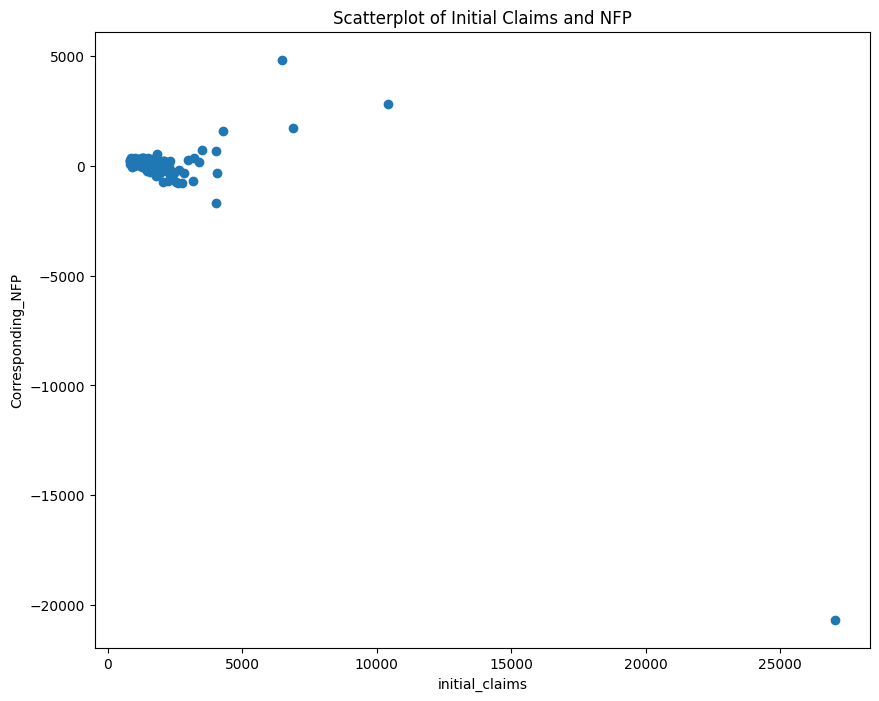

In [105]:

# Plot the scatterplot with colored points
fig, ax = plt.subplots(figsize=(10, 8))
plt.scatter(claims_nfp['initial_claims'], claims_nfp['Corresponding_NFP'])

# Set axis labels and title
plt.xlabel('initial_claims')
plt.ylabel('Corresponding_NFP')
plt.title('Scatterplot of Initial Claims and NFP')


# Show the plot
plt.show()

From the scatterplot, we can see that there is one extreme outlier. 

After inspecting the dataset, we can see that this occured at 2020 April which was during the Covid Pandemic and other economic factors such as Oil price crash and Fiscal stimulus measures

No handles with labels found to put in legend.


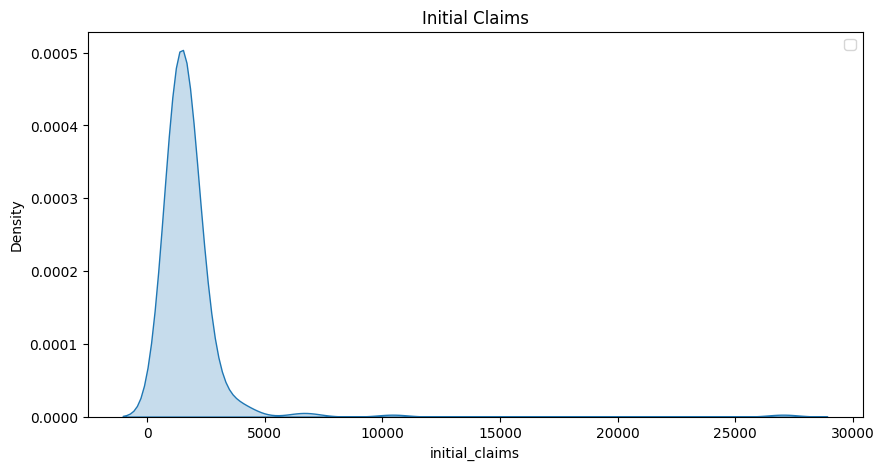

In [106]:
# Kernel Distribution Estimation (KDE) plot for Limit Balance with kurtosis and skewness
import scipy.stats as st
fig, axs = plt.subplots(figsize=(10, 5))
sns.kdeplot(x="initial_claims", fill=True, data=claims_nfp, ax=axs)
axs.set_title("Initial Claims")
axs.legend()


By visual inspection, we can see that the distribution of claims is close to a normal distribution since it only has one peak.

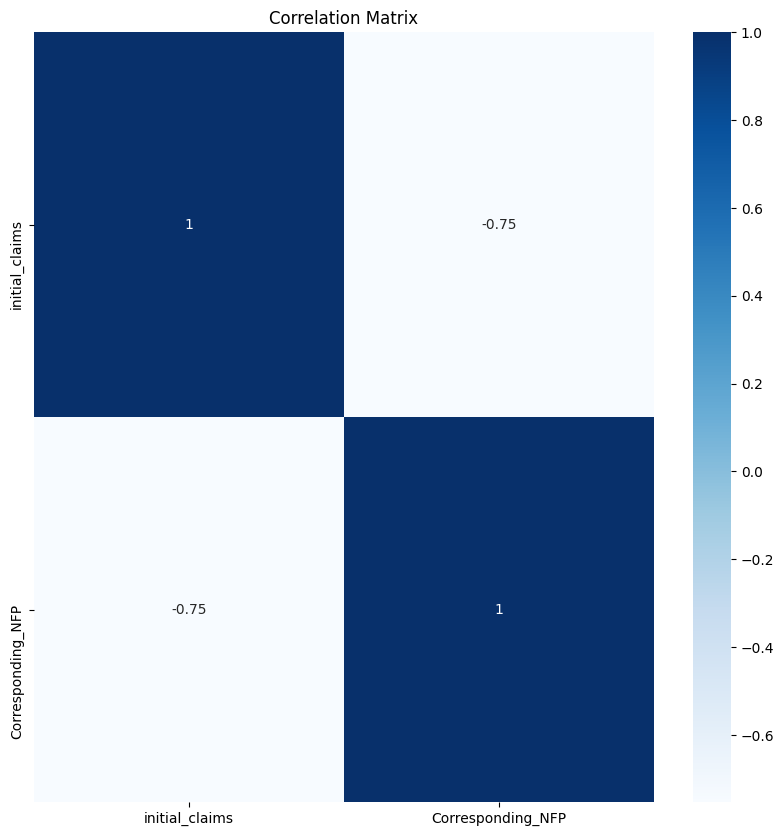

corr is: -0.7528640518842683


In [107]:
# Correlation Matrix for each column
plt.figure(figsize=(10,10))
sns.heatmap(claims_nfp.corr(),cbar=True,annot=True,cmap='Blues')
plt.title("Correlation Matrix")
plt.show()
corr = claims_nfp["Corresponding_NFP"].corr(claims_nfp["initial_claims"])
print(f'corr is: {corr}')

We can see that Initials Claim and Corresponding NFP have a strong negative correlation

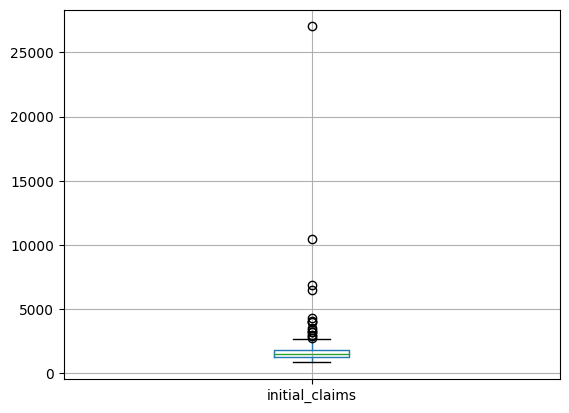

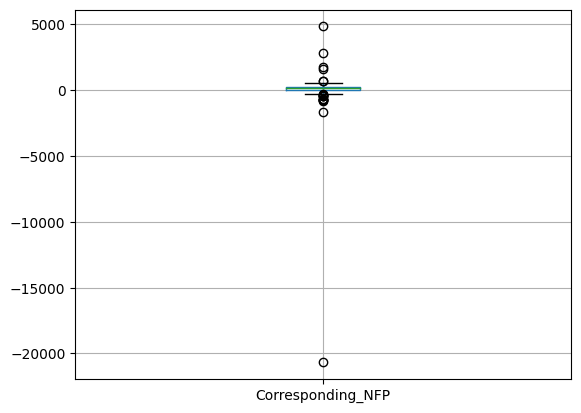

In [108]:
for column in claims_nfp.iloc[:, 1:]:
    plt.figure()
    claims_nfp.boxplot([column])

From our boxplot, we can see that there are extreme outliers. But we will not remove them as it comes from real life data and we will include it in our machine learning model. Removing them might affect the statistics of the dataset.

By inspecting our dataset, we can see the outliers came during April 2020, which was during the Covid Pandemic and other economic factors such as Oil price crash and Fiscal stimulus measures

# Training and Test Splitting

In [109]:
train = claims_nfp[claims_nfp['month'] < '2019-12-31'] #Before Jan 2020
print(train.head())

     month  initial_claims  Corresponding_NFP
0  2001-01             998                -10
1  2001-02            1461                 92
2  2001-03            1934                -43
3  2001-04            1569               -286
4  2001-05            1984                -49


In [110]:
x_train = train["initial_claims"]
y_train = train["Corresponding_NFP"]
print(x_train)
print(y_train)

0       998
1      1461
2      1934
3      1569
4      1984
       ... 
223    1078
224     853
225    1078
226     868
227     890
Name: initial_claims, Length: 228, dtype: int64
0      -10
1       92
2      -43
3     -286
4      -49
      ... 
223    195
224    221
225    195
226    234
227    161
Name: Corresponding_NFP, Length: 228, dtype: int32


In [111]:
test = claims_nfp[claims_nfp['month'] > '2019-12-31'] #After Jan 2020
print(test.head())

       month  initial_claims  Corresponding_NFP
228  2020-01            1071                315
229  2020-02             840                289
230  2020-03            4017              -1683
231  2020-04           27028             -20679
232  2020-05           10432               2833


In [112]:
x_test = test["initial_claims"]
y_test = test["Corresponding_NFP"]
print(x_test)
print(y_test)

228     1071
229      840
230     4017
231    27028
232    10432
233     6485
234     6883
235     4277
236     3516
237     4013
238     3003
239     4058
240     3398
241     3230
Name: initial_claims, dtype: int64
228      315
229      289
230    -1683
231   -20679
232     2833
233     4846
234     1726
235     1583
236      716
237      680
238      264
239     -306
240      166
241      379
Name: Corresponding_NFP, dtype: int32


# Normality Check and Standardization

Now, we check for normality of the data and I will be using the Shapiro-Wilk test. If the data is not normally distributed, we may need to transform or standardize it.

In [113]:
from scipy.stats import shapiro 
from scipy.stats import lognorm
np.random.seed(1)
norm_claims = shapiro(claims_nfp["initial_claims"])
print(norm_claims)
norm_nfp = shapiro(claims_nfp["Corresponding_NFP"])
print(norm_nfp)

ShapiroResult(statistic=0.2795444130897522, pvalue=1.1304204431179732e-29)
ShapiroResult(statistic=0.17017698287963867, pvalue=2.5898284650310894e-31)


Since the p-value from the Shapiro-Wilk test is less than 0.05, we can reject the null hypothesis that the sample data comes from a normal distribution. The presence of outliers in the data may have contributed to this result, which is common in real-life datasets.  

Nevertheless, with a sample size of 242, we can assume normality of the data using the Central Limit Theorem.

To prepare the data for modeling, we can use standardization to transform the independent features in the train and test datasets. This involves removing the mean and scaling the variances to unit variance using the z-score method, which can help avoid issues with attributes having large variances that dominate the model. The 'sklearn.preprocessing.StandardScaler' library in Python can be used for this purpose.  

The purpose of transforming the data is to avoid a certain attribute with variance of much larger magnitude dominating the other attributes when modeling, producing inaccurate predictions as a result of this.


Standardization is a common preprocessing step in machine learning that involves transforming the data so that it has zero mean and unit variance. This can help improve the performance of machine learning models.

In [114]:
# Standardization fo X_train and X_test data to standard normal
sc = StandardScaler()
sc.fit(x_train.values.reshape(-1, 1))
X_train_scaled = sc.transform(x_train.values.reshape(-1, 1))
X_test_scaled = sc.transform(x_test.values.reshape(-1, 1))

# Linear Regression

In [115]:
# create a LinearRegression object
reg = LinearRegression()

# fit the model to the training data
reg.fit(X_train_scaled, y_train)

print("Coefficients:", reg.coef_)
print("Intercept:", reg.intercept_)
print("R-squared:", reg.score(X_train_scaled, y_train))

#Using OLS
model = sm.OLS(y_train, X_train_scaled).fit()
p_values = model.summary2().tables[1]['P>|t|']

print("P-values:", p_values)


# Predict the dependent variable for the test set
y_pred = reg.predict(X_test_scaled)

# calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Predicted NFP:", y_pred)
print("Mean squared error:", mse)
# calculate the mean absolute error
mae = mean_absolute_error(y_test, y_pred)
# calculate the root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
# print the MAE and RMSE
print("Mean absolute error: ", mae)
print("Root mean squared error: ", rmse)
medae = median_absolute_error(y_test, y_pred)
evs = explained_variance_score(y_test, y_pred)
print("Median absolute error:", medae) 
print("Explained variance score:", evs) 


Coefficients: [-136.46952314]
Intercept: 84.28070175438599
R-squared: 0.394453625138236
P-values: x1    1.801906e-22
Name: P>|t|, dtype: float64
Predicted NFP: [  226.47060805   300.49897823  -717.63146366 -8091.9467291
 -2773.44096467 -1508.54928883 -1636.09600456  -800.95343876
  -557.07642702  -716.34958712  -392.67576077  -730.77069819
  -519.26106909  -465.42225441]
Mean squared error: 18109858.37626068
Mean absolute error:  2617.1461193472787
Root mean squared error:  4255.567926406613
Median absolute error: 1119.2224816829605
Explained variance score: 0.4667285176588386


# Comments of Statistics

Coefficients: -136.46952314 refers to the slope of the linear regression model, indicating how much the dependent variable (NFP) changes for each unit change in the independent variable (scaled initial claims).

Intercept: 84.28070175438599 is the value of NFP when the independent variable(scaled initial claims) is zero.

R-squared: 0.394453625138236 represents the proportion of variance in the dependent variable (NFP) that is explained by the independent variable (scaled initial claims). In this case, the model explains about 39.45% of the variance in the NFP variable.

P-values: 1.801906e-22 refers to the statistical significance of the independent variable (scaled initial claims). The p-value of 1.801906e-22 indicates that the independent variable is statistically significant in predicting the dependent variable as we reject the null hypothesis that there is no relationship between our variables

Predicted NFP: Represents the predicted values of NFP based on the independent variable (scaled initial claims) and the regression model.

Mean squared error: 18109858.37626068 is the average squared difference between the predicted values and the actual values of the dependent variable (NFP). The smaller the value of MSE, the better the model's performance.

Mean absolute error: 2617.1461193472787 is the average absolute difference between the predicted values and the actual values of the dependent variable (NFP). The smaller the value of MAE, the better the model's performance.

Root mean squared error: 4255.567926406613 is the square root of the MSE, indicating the average difference between the predicted and actual values of the dependent variable (NFP). The smaller the value of RMSE, the better the model's performance.

Median absolute error: 1119.2224816829605 is the median of the absolute differences between the predicted and actual values of the dependent variable (NFP). It represents the midpoint of the absolute differences and is less sensitive to outliers than MAE.

Explained variance score: 0.4667285176588386 represents the proportion of variance in the dependent variable (NFP) that is explained by the independent variable (scaled initial claims). In this case, the model explains about 46.67% of the variance in the NFP variable. The higher the value of the explained variance score, the better the model's performance.

# Evaluation of Errors

The mean squared error (MSE), mean absolute error (MAE), and root mean squared error (RMSE) are measures of the accuracy of a regression model. The higher values of these metrics indicate that the model's predictions deviate further from the actual values, on average. In this case, the high values of MSE, MAE, and RMSE suggest that the model may not be accurately capturing the relationships between the scaled initial claims and the NFP variable.

Specifically, the MSE is calculated as the average squared difference between the predicted and actual values. Therefore, the high MSE value of 18,109,858.38 indicates that, on average, the model's predictions are off by a large margin.

Similarly, the MAE is calculated as the average absolute difference between the predicted and actual values. Therefore, the high MAE value of 2,617.15 indicates that, on average, the model's predictions are off by about $2,617 in terms of the NFP.

Finally, the RMSE is calculated as the square root of the MSE, and therefore is in the same unit as the dependent variable. In this case, the high RMSE value of 4,255.57 indicates that the model's predictions are off by about $4,255 on average.

In summary, the high MSE, MAE, and RMSE suggest that the model's accuracy in predicting the NFP is moderate, and there may be other variables that should be considered to improve the model's performance.

# Manual Calculation of NFP

In [116]:
#Manually calculating the NFP data after Jan-2020
coef = reg.coef_[0]
calculated_NFP = []

for i in X_test_scaled:
    result = i[0] * coef
    calculated_NFP.append(result)

In [117]:
for i in range(len(calculated_NFP)):
    manual = calculated_NFP[i]
    machine = y_pred[i]
    print(f"Calculated NFP is {manual} while predicted NFP is {machine}")

Calculated NFP is 142.18990629247375 while predicted NFP is 226.47060804685975
Calculated NFP is 216.21827647704905 while predicted NFP is 300.49897823143505
Calculated NFP is -801.9121654121102 while predicted NFP is -717.6314636577242
Calculated NFP is -8176.227430854805 while predicted NFP is -8091.946729100418
Calculated NFP is -2857.721666425316 while predicted NFP is -2773.44096467093
Calculated NFP is -1592.8299905875729 while predicted NFP is -1508.549288833187
Calculated NFP is -1720.3767063168411 while predicted NFP is -1636.0960045624552
Calculated NFP is -885.2341405116322 while predicted NFP is -800.9534387572462
Calculated NFP is -641.3571287780312 while predicted NFP is -557.0764270236452
Calculated NFP is -800.6302888721175 while predicted NFP is -716.3495871177315
Calculated NFP is -476.9564625239743 while predicted NFP is -392.67576076958835
Calculated NFP is -815.0513999470347 while predicted NFP is -730.7706981926488
Calculated NFP is -603.5417708482481 while predic

# Evaluation of Models

Since Linear Regression is not a classification algorithm, we are unable to use metrics such as ROC or Cumulative Gain/Lift

To visualize the performance model, I can plot the predicted values against the actual values using a scatter plot.

# Scatter Plot

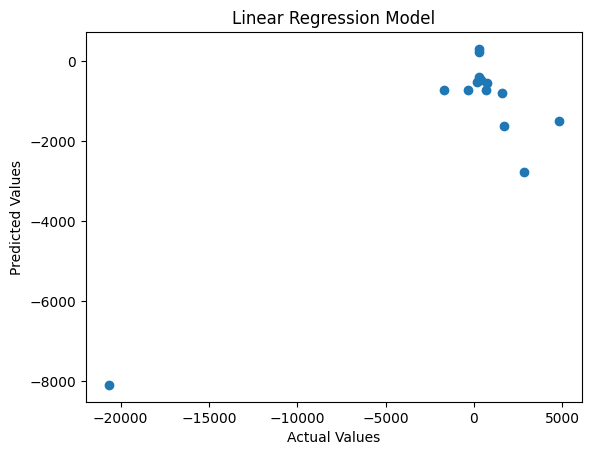

Correlation coefficient: 0.839500761856578


In [118]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Model')
plt.show()
# calculate the correlation coefficient between y_test and y_pred
corr = np.corrcoef(y_test, y_pred)[0, 1]

print(f"Correlation coefficient: {corr}")

This shows that there is a strong positive correlation between our actual and predicted NFP results

# Residual Plot

Correlation coefficient: 0.9651696307471249


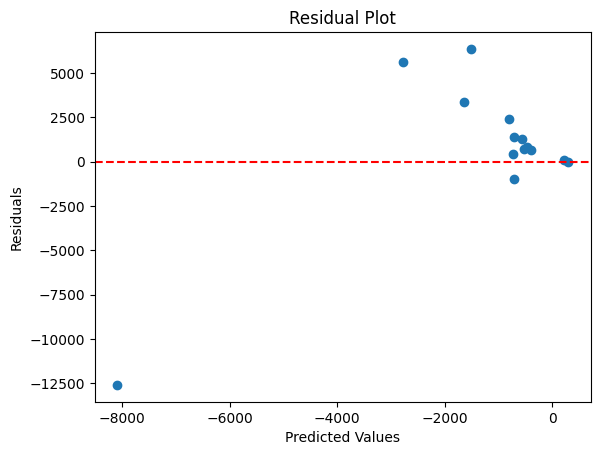

In [119]:
# Calculate the residuals
residuals = y_test - y_pred

# Plot the residuals
plt.scatter(y_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
corr = np.corrcoef(y_test, residuals)[0, 1]

print(f"Correlation coefficient: {corr}")
plt.show()

From the residual plot, we can observe that the residuals are not uniformly scattered around 0, despite the absence of any discernible pattern. However, we can note that there is a strong positive correlation between the two variables.

Additionally, there is one extreme outlier, which may indicate that the model is not capturing some crucial aspect of the data.

# Final Evaluation of Statistics and Comments on Test Results

Overall, the linear regression model explains about 39.45% of the variance in the NFP, as indicated by the R-squared value of 0.3945. This means that there is a significant amount of unexplained variance in the NFP variable that is not captured by the model.

In terms of the accuracy measures, the mean squared error (MSE) is 18,109,858.38, indicating that the average squared difference between the predicted and actual values is high. The mean absolute error (MAE) is 2,617.15, suggesting that the average absolute difference between the predicted and actual values is also moderately high.  

These accuracy measures suggest that the model has a moderate level of accuracy in predicting the dependent variable. However, the high MSE, MAE, and RMSE values indicate that the model may not be capturing the relationships between the scaled initial claims and the NFP variable accurately.  

The R-squared value can be increased by introducing more independent variables, which may capture some of the unexplained variance in the NFP.  

It is important to note that while the model shows a statistically significant relationship between initial claims and NFP, there may be other determinants of NFP that are not captured by the initial claims data. Changes in government policy, economic conditions, technological advancements, and other factors could all have an impact on NFP. Therefore, using initial claims as the sole predictor of NFP may not provide the most accurate predictions. Further analysis and consideration of additional factors may be necessary to develop a more comprehensive model of NFP.  

